In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data():
    train = pd.read_csv('/kaggle/input/store-sales/train.csv')
    test = pd.read_csv('/kaggle/input/store-sales/test.csv')
    holidays = pd.read_csv('/kaggle/input/store-sales/holidays_events.csv')
    oil = pd.read_csv('/kaggle/input/store-sales/oil.csv')
    stores = pd.read_csv('/kaggle/input/store-sales/stores.csv')
    transactions = pd.read_csv('/kaggle/input/store-sales/transactions.csv')
    return train, test, holidays, oil, stores, transactions

train, test, holidays, oil, stores, transactions = load_data()

In [3]:
def convert_dates(df_list):
    for df in df_list:
        df['date'] = pd.to_datetime(df['date'])

convert_dates([train, test, holidays, oil, transactions])

In [4]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [5]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [6]:
holidays.head()
holidays.drop("description",axis=1)
holidays.drop(holidays[holidays.transferred == True].index, inplace=True)
holidays.drop("transferred", axis=1)


,date,type,locale,locale_name,description
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba
...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3
346,2017-12-23,Additional,National,Ecuador,Navidad-2
347,2017-12-24,Additional,National,Ecuador,Navidad-1
348,2017-12-25,Holiday,National,Ecuador,Navidad


In [7]:
holidays["locale_name"].unique()

array(['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo',
       'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
       'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil'],
      dtype=object)

In [8]:
stores.state.unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [9]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [10]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [11]:
train.describe()

,id,date,store_nbr,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01


In [12]:
train.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object

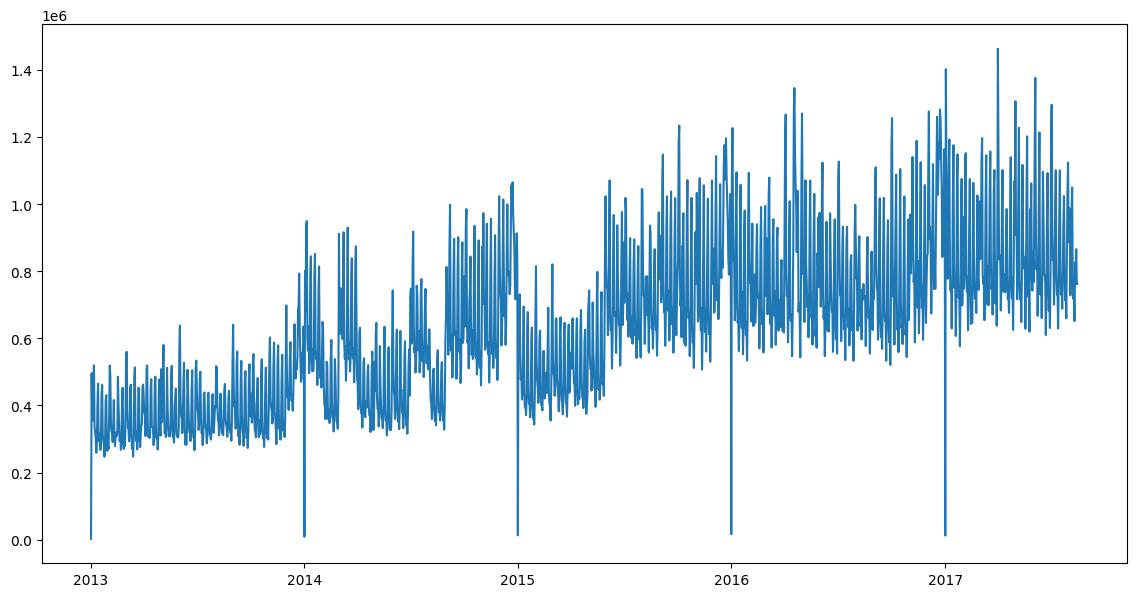

In [13]:
plt.figure(figsize=(14,7))
plt.plot(train.groupby("date").sum()["sales"])

In [14]:
print(train.isnull().sum())
print(test.isnull().sum())
print(oil.isnull().sum())
print(holidays.isnull().sum())
print(stores.isnull().sum())
print(transactions.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
date           0
dcoilwtico    43
dtype: int64
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
date            0
store_nbr       0
transactions    0
dtype: int64


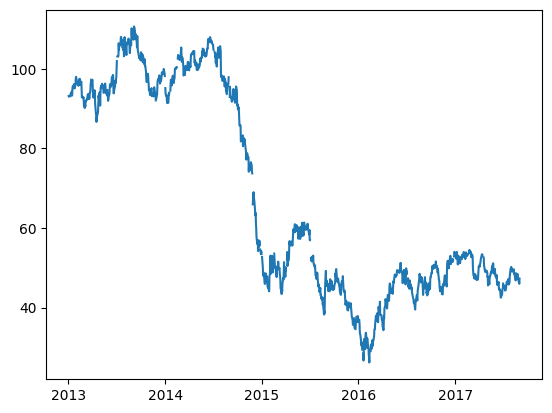

In [15]:
plt.plot(oil.date, oil.dcoilwtico)

date          0
dcoilwtico    1
dtype: int64


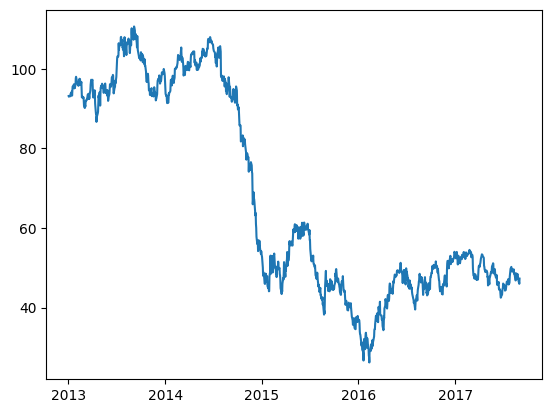

In [16]:
oil["dcoilwtico"] = oil["dcoilwtico"].interpolate()
plt.plot(oil.date, oil.dcoilwtico)
print(oil.isnull().sum())

date          0
dcoilwtico    0
dtype: int64


/tmp/ipykernel_18/4181220988.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil["dcoilwtico"] = oil["dcoilwtico"].fillna(method="bfill")


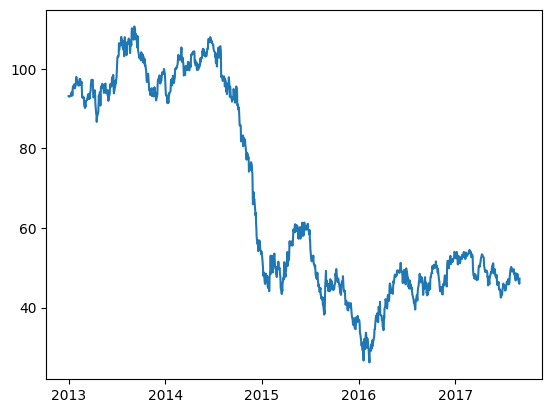

In [17]:
oil["dcoilwtico"] = oil["dcoilwtico"].fillna(method="bfill")
print(oil.isnull().sum())
plt.plot(oil.date, oil.dcoilwtico)

In [18]:
from sklearn.preprocessing import LabelEncoder

def merge_datasets(train, test, stores, transactions, oil, holidays):
    le_family = LabelEncoder()

    merged_dfs = []
    
    for df in [train, test]:
        df['family'] = le_family.fit_transform(df['family'])
        df = df.merge(stores, on='store_nbr', how='left')
        df = df.merge(transactions, on=['date', 'store_nbr'], how='left')
        df = df.merge(oil, on='date', how='left')
        df = df.merge(holidays, on='date', how='left')
        merged_dfs.append(df) 
    
    return merged_dfs[0], merged_dfs[1]


train, test = merge_datasets(train, test, stores, transactions, oil, holidays)

<Axes: xlabel='family', ylabel='sales'>

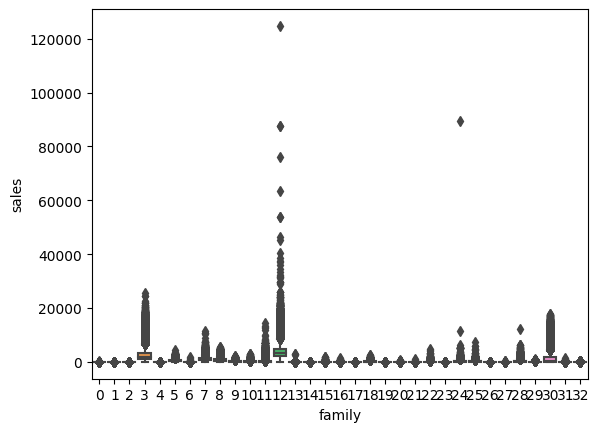

In [19]:
sns.boxplot(x='family', y='sales', data=train)


<Axes: xlabel='store_nbr', ylabel='sales'>

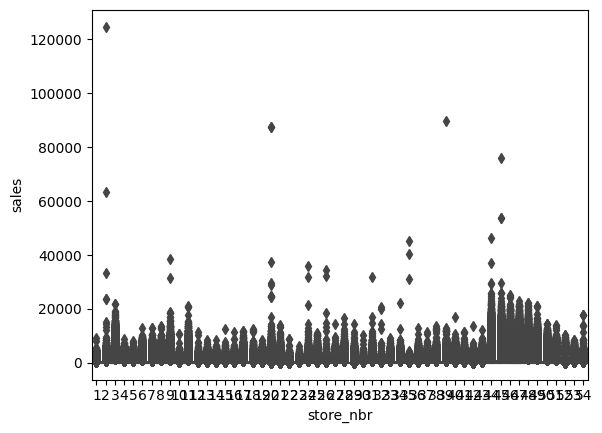

In [20]:
sns.boxplot(x='store_nbr', y='sales', data=train)

In [21]:
def fechas(df):
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofweek'] = df['date'].dt.dayofweek
    return df

train = fechas(train)
test = fechas(test)

In [22]:
def remover_outliers(df):
    Q1 = df['sales'].quantile(0.25)
    Q3 = df['sales'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df['sales'] < (Q1 - 1.5 * IQR)) | (df['sales'] > (Q3 + 1.5 * IQR)))]
    return df

train = remover_outliers(train)

In [23]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


/tmp/ipykernel_18/653072051.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/co

<Axes: title={'center': 'Seasonal Plot (year/day)'}, xlabel='day', ylabel='sales'>

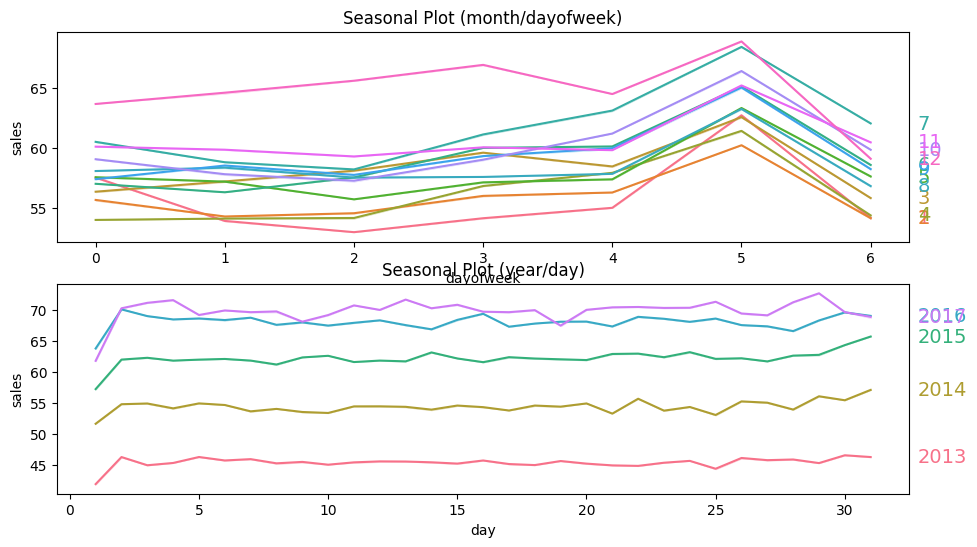

In [24]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(train, y="sales", period="month", freq="dayofweek", ax=ax0)
seasonal_plot(train, y="sales", period="year", freq="day", ax=ax1)


In [25]:
def holidays(train, test):
    for df in [train, test]:
      
        df["national_holiday"] = 0
        df["regional_holiday"] = 0
        df["local_holiday"] = 0
        
  
        df.loc[df["locale"] == "National", "national_holiday"] = 1
        df.loc[(df["locale"] == "Regional") & (df["locale_name"] == df["state"]), "regional_holiday"] = 1
        df.loc[(df["locale"] == "Local") & (df["locale_name"] == df["city"]), "local_holiday"] = 1
        
       
        df.fillna(0, inplace=True)
    
    return train, test
train, test = holidays(train, test)

In [26]:
train = pd.get_dummies(train,columns=["city","state"],dtype=int)
test = pd.get_dummies(test,columns=["city","state"],dtype=int)


In [27]:
train.drop(["type_x","type_y","locale","locale_name","description"],axis=1,inplace=True)
test.drop(["type_x","type_y","locale","locale_name","description"],axis=1,inplace=True)

In [28]:
train["transferred"] = train["transferred"].astype(int)
test["transferred"] = test["transferred"].astype(int)

In [29]:
from prophet import Prophet

In [30]:
train = train.reset_index(drop=True)
train['Fonpromotion'] = np.where(train['onpromotion'] > 0, 1, 0)
train = train.rename(columns={'date': 'ds', 'sales': 'y'})
train['ds'] = pd.to_datetime(train['ds'])
tiendas = train['store_nbr'].unique()
familias = train['family'].unique()
desvios = pd.DataFrame()


In [31]:
for t in tiendas:
    print('Tienda: ', t)
    for f in familias:
        print('Familia: ', f)
        train1 = train[(train['store_nbr'] == t) & (train['family'] == f)].reset_index(drop=True).sort_values("ds")
        calendar = pd.date_range(start=train['ds'].min(), end=train['ds'].max())
        calendar = pd.DataFrame(calendar, columns=['ds'])
        train1 = train1.merge(calendar, on='ds', how='right').reset_index(drop=True).sort_values("ds")
        train1['y'] = train1['y'].fillna(0)
        train1['Fonpromotion'] = train1['Fonpromotion'].fillna(0)
        train1['national_holiday'] = train1['national_holiday'].fillna(0)
        train1['regional_holiday'] = train1['regional_holiday'].fillna(0)
        train1['local_holiday'] = train1['local_holiday'].fillna(0)
        train1['dcoilwtico'] =  train1['dcoilwtico'].interpolate().fillna(0)
        train1Train = train1[train1['ds'] < '2017-08-09'].reset_index(drop=True)
        train1Test = train1[train1['ds'] >= '2017-08-09'].reset_index(drop=True)
        # Modelo
        m = Prophet()
        m.add_regressor('dcoilwtico')
        m.add_regressor('Fonpromotion')
        m.add_regressor('national_holiday')
        m.add_regressor('regional_holiday')
        m.add_regressor('local_holiday')
        m.fit(train1Train)
        future = m.make_future_dataframe(periods=7, freq='D', include_history=False)
        future['dcoilwtico'] = train1Test['dcoilwtico']
        future['Fonpromotion'] = train1Test['Fonpromotion']
        future['national_holiday'] = train1Test['national_holiday']
        future['regional_holiday'] = train1Test['regional_holiday']
        future['local_holiday'] = train1Test['local_holiday']
        forecast = m.predict(future)
        forecast = forecast[['ds', 'yhat']]
        forecast['store_nbr'] = t
        forecast['family'] = f
        forecast = pd.merge(forecast, train1Test[['ds', 'y', 'store_nbr', 'family']], on=['ds', 'store_nbr', 'family'])
        forecast['desvio%'] = (((forecast['y'] - forecast['yhat']) / forecast['y']) * 100).round(2)
        forecast['desvio_abs'] = (forecast['y'] - forecast['yhat']).round(2)
        desvios = pd.concat([desvios, forecast])

desvios

Tienda:  1
Familia:  0


23:57:39 - cmdstanpy - INFO - Chain [1] start processing
23:57:39 - cmdstanpy - INFO - Chain [1] done processing


Familia:  1


23:57:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


23:57:41 - cmdstanpy - INFO - Chain [1] done processing
23:57:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


23:57:42 - cmdstanpy - INFO - Chain [1] done processing
23:57:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


23:57:42 - cmdstanpy - INFO - Chain [1] done processing
23:57:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


23:57:43 - cmdstanpy - INFO - Chain [1] done processing
23:57:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


23:57:44 - cmdstanpy - INFO - Chain [1] done processing
23:57:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


23:57:45 - cmdstanpy - INFO - Chain [1] done processing
23:57:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


23:57:46 - cmdstanpy - INFO - Chain [1] done processing
23:57:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


23:57:46 - cmdstanpy - INFO - Chain [1] done processing
23:57:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


23:57:47 - cmdstanpy - INFO - Chain [1] done processing
23:57:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


23:57:48 - cmdstanpy - INFO - Chain [1] done processing
23:57:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  12


23:57:49 - cmdstanpy - INFO - Chain [1] done processing
23:57:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


23:57:50 - cmdstanpy - INFO - Chain [1] done processing
23:57:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


23:57:51 - cmdstanpy - INFO - Chain [1] done processing
23:57:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


23:57:52 - cmdstanpy - INFO - Chain [1] done processing
23:57:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


23:57:53 - cmdstanpy - INFO - Chain [1] done processing
23:57:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


23:57:53 - cmdstanpy - INFO - Chain [1] done processing
23:57:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


23:57:54 - cmdstanpy - INFO - Chain [1] done processing
23:57:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


23:57:55 - cmdstanpy - INFO - Chain [1] done processing
23:57:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


23:57:56 - cmdstanpy - INFO - Chain [1] done processing
23:57:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


23:57:57 - cmdstanpy - INFO - Chain [1] done processing
23:57:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


23:57:58 - cmdstanpy - INFO - Chain [1] done processing
23:57:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


23:57:59 - cmdstanpy - INFO - Chain [1] done processing
23:57:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


23:57:59 - cmdstanpy - INFO - Chain [1] done processing
23:58:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


23:58:00 - cmdstanpy - INFO - Chain [1] done processing
23:58:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


23:58:01 - cmdstanpy - INFO - Chain [1] done processing
23:58:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


23:58:02 - cmdstanpy - INFO - Chain [1] done processing
23:58:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


23:58:03 - cmdstanpy - INFO - Chain [1] done processing
23:58:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


23:58:04 - cmdstanpy - INFO - Chain [1] done processing
23:58:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


23:58:04 - cmdstanpy - INFO - Chain [1] done processing
23:58:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


23:58:05 - cmdstanpy - INFO - Chain [1] done processing
23:58:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


23:58:06 - cmdstanpy - INFO - Chain [1] done processing
23:58:07 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  10
Familia:  0


23:58:07 - cmdstanpy - INFO - Chain [1] done processing
23:58:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


23:58:08 - cmdstanpy - INFO - Chain [1] done processing
23:58:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


23:58:09 - cmdstanpy - INFO - Chain [1] done processing
23:58:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


23:58:10 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


23:58:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


23:58:11 - cmdstanpy - INFO - Chain [1] done processing
23:58:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


23:58:12 - cmdstanpy - INFO - Chain [1] done processing
23:58:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


23:58:13 - cmdstanpy - INFO - Chain [1] done processing
23:58:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


23:58:14 - cmdstanpy - INFO - Chain [1] done processing
23:58:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


23:58:15 - cmdstanpy - INFO - Chain [1] done processing
23:58:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


23:58:15 - cmdstanpy - INFO - Chain [1] done processing
23:58:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


23:58:16 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


23:58:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


23:58:18 - cmdstanpy - INFO - Chain [1] done processing
23:58:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


23:58:19 - cmdstanpy - INFO - Chain [1] done processing
23:58:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


23:58:19 - cmdstanpy - INFO - Chain [1] done processing
23:58:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


23:58:21 - cmdstanpy - INFO - Chain [1] done processing
23:58:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


23:58:21 - cmdstanpy - INFO - Chain [1] done processing
23:58:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


23:58:22 - cmdstanpy - INFO - Chain [1] done processing
23:58:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


23:58:23 - cmdstanpy - INFO - Chain [1] done processing
23:58:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


23:58:24 - cmdstanpy - INFO - Chain [1] done processing
23:58:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


23:58:25 - cmdstanpy - INFO - Chain [1] done processing
23:58:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


23:58:26 - cmdstanpy - INFO - Chain [1] done processing
23:58:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


23:58:27 - cmdstanpy - INFO - Chain [1] done processing
23:58:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


23:58:28 - cmdstanpy - INFO - Chain [1] done processing
23:58:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


23:58:28 - cmdstanpy - INFO - Chain [1] done processing
23:58:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


23:58:29 - cmdstanpy - INFO - Chain [1] done processing
23:58:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


23:58:30 - cmdstanpy - INFO - Chain [1] done processing
23:58:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


23:58:31 - cmdstanpy - INFO - Chain [1] done processing
23:58:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


23:58:32 - cmdstanpy - INFO - Chain [1] done processing
23:58:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


23:58:33 - cmdstanpy - INFO - Chain [1] done processing
23:58:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


23:58:34 - cmdstanpy - INFO - Chain [1] done processing
23:58:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


23:58:35 - cmdstanpy - INFO - Chain [1] done processing
23:58:36 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  11
Familia:  0


23:58:36 - cmdstanpy - INFO - Chain [1] done processing
23:58:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


23:58:37 - cmdstanpy - INFO - Chain [1] done processing
23:58:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


23:58:38 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3
Familia:  4


23:58:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


23:58:39 - cmdstanpy - INFO - Chain [1] done processing
23:58:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


23:58:41 - cmdstanpy - INFO - Chain [1] done processing


Familia:  7


23:58:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


23:58:42 - cmdstanpy - INFO - Chain [1] done processing
23:58:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


23:58:43 - cmdstanpy - INFO - Chain [1] done processing
23:58:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


23:58:44 - cmdstanpy - INFO - Chain [1] done processing
23:58:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


23:58:45 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


23:58:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


23:58:46 - cmdstanpy - INFO - Chain [1] done processing
23:58:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


23:58:47 - cmdstanpy - INFO - Chain [1] done processing
23:58:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


23:58:48 - cmdstanpy - INFO - Chain [1] done processing
23:58:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


23:58:49 - cmdstanpy - INFO - Chain [1] done processing
23:58:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


23:58:50 - cmdstanpy - INFO - Chain [1] done processing
23:58:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


23:58:51 - cmdstanpy - INFO - Chain [1] done processing
23:58:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


23:58:51 - cmdstanpy - INFO - Chain [1] done processing
23:58:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


23:58:52 - cmdstanpy - INFO - Chain [1] done processing
23:58:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


23:58:53 - cmdstanpy - INFO - Chain [1] done processing
23:58:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


23:58:54 - cmdstanpy - INFO - Chain [1] done processing
23:58:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


23:58:55 - cmdstanpy - INFO - Chain [1] done processing
23:58:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


23:58:56 - cmdstanpy - INFO - Chain [1] done processing
23:58:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


23:58:57 - cmdstanpy - INFO - Chain [1] done processing
23:58:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


23:58:57 - cmdstanpy - INFO - Chain [1] done processing
23:58:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


23:58:58 - cmdstanpy - INFO - Chain [1] done processing
23:58:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


23:58:59 - cmdstanpy - INFO - Chain [1] done processing
23:59:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


23:59:00 - cmdstanpy - INFO - Chain [1] done processing


Familia:  30


23:59:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


23:59:01 - cmdstanpy - INFO - Chain [1] done processing
23:59:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


23:59:02 - cmdstanpy - INFO - Chain [1] done processing
23:59:03 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  12
Familia:  0


23:59:03 - cmdstanpy - INFO - Chain [1] done processing
23:59:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


23:59:04 - cmdstanpy - INFO - Chain [1] done processing
23:59:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


23:59:05 - cmdstanpy - INFO - Chain [1] done processing
23:59:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


23:59:06 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


23:59:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


23:59:07 - cmdstanpy - INFO - Chain [1] done processing
23:59:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


23:59:08 - cmdstanpy - INFO - Chain [1] done processing
23:59:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


23:59:09 - cmdstanpy - INFO - Chain [1] done processing
23:59:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


23:59:10 - cmdstanpy - INFO - Chain [1] done processing
23:59:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


23:59:10 - cmdstanpy - INFO - Chain [1] done processing
23:59:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


23:59:11 - cmdstanpy - INFO - Chain [1] done processing
23:59:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


23:59:12 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


23:59:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


23:59:13 - cmdstanpy - INFO - Chain [1] done processing
23:59:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


23:59:14 - cmdstanpy - INFO - Chain [1] done processing
23:59:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


23:59:15 - cmdstanpy - INFO - Chain [1] done processing
23:59:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


23:59:16 - cmdstanpy - INFO - Chain [1] done processing
23:59:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


23:59:17 - cmdstanpy - INFO - Chain [1] done processing
23:59:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


23:59:18 - cmdstanpy - INFO - Chain [1] done processing
23:59:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


23:59:19 - cmdstanpy - INFO - Chain [1] done processing
23:59:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


23:59:19 - cmdstanpy - INFO - Chain [1] done processing
23:59:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


23:59:20 - cmdstanpy - INFO - Chain [1] done processing
23:59:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


23:59:21 - cmdstanpy - INFO - Chain [1] done processing
23:59:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


23:59:22 - cmdstanpy - INFO - Chain [1] done processing
23:59:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


23:59:23 - cmdstanpy - INFO - Chain [1] done processing
23:59:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


23:59:24 - cmdstanpy - INFO - Chain [1] done processing
23:59:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


23:59:25 - cmdstanpy - INFO - Chain [1] done processing
23:59:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


23:59:26 - cmdstanpy - INFO - Chain [1] done processing
23:59:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


23:59:27 - cmdstanpy - INFO - Chain [1] done processing
23:59:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


23:59:27 - cmdstanpy - INFO - Chain [1] done processing
23:59:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


23:59:28 - cmdstanpy - INFO - Chain [1] done processing
23:59:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


23:59:29 - cmdstanpy - INFO - Chain [1] done processing
23:59:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


23:59:30 - cmdstanpy - INFO - Chain [1] done processing
23:59:31 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  13
Familia:  0


23:59:31 - cmdstanpy - INFO - Chain [1] done processing


Familia:  1


23:59:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


23:59:32 - cmdstanpy - INFO - Chain [1] done processing
23:59:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


23:59:33 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


23:59:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


23:59:34 - cmdstanpy - INFO - Chain [1] done processing
23:59:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


23:59:35 - cmdstanpy - INFO - Chain [1] done processing
23:59:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


23:59:36 - cmdstanpy - INFO - Chain [1] done processing
23:59:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


23:59:37 - cmdstanpy - INFO - Chain [1] done processing
23:59:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


23:59:38 - cmdstanpy - INFO - Chain [1] done processing
23:59:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


23:59:39 - cmdstanpy - INFO - Chain [1] done processing
23:59:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


23:59:40 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


23:59:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


23:59:41 - cmdstanpy - INFO - Chain [1] done processing
23:59:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


23:59:42 - cmdstanpy - INFO - Chain [1] done processing
23:59:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


23:59:43 - cmdstanpy - INFO - Chain [1] done processing
23:59:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


23:59:44 - cmdstanpy - INFO - Chain [1] done processing
23:59:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


23:59:45 - cmdstanpy - INFO - Chain [1] done processing
23:59:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


23:59:45 - cmdstanpy - INFO - Chain [1] done processing
23:59:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


23:59:46 - cmdstanpy - INFO - Chain [1] done processing
23:59:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


23:59:47 - cmdstanpy - INFO - Chain [1] done processing
23:59:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


23:59:48 - cmdstanpy - INFO - Chain [1] done processing
23:59:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


23:59:49 - cmdstanpy - INFO - Chain [1] done processing
23:59:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


23:59:50 - cmdstanpy - INFO - Chain [1] done processing
23:59:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


23:59:50 - cmdstanpy - INFO - Chain [1] done processing
23:59:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


23:59:51 - cmdstanpy - INFO - Chain [1] done processing
23:59:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


23:59:52 - cmdstanpy - INFO - Chain [1] done processing
23:59:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


23:59:53 - cmdstanpy - INFO - Chain [1] done processing
23:59:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


23:59:54 - cmdstanpy - INFO - Chain [1] done processing
23:59:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


23:59:55 - cmdstanpy - INFO - Chain [1] done processing
23:59:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


23:59:56 - cmdstanpy - INFO - Chain [1] done processing
23:59:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


23:59:56 - cmdstanpy - INFO - Chain [1] done processing
23:59:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


23:59:57 - cmdstanpy - INFO - Chain [1] done processing
23:59:58 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  14
Familia:  0


23:59:58 - cmdstanpy - INFO - Chain [1] done processing
23:59:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


23:59:59 - cmdstanpy - INFO - Chain [1] done processing
00:00:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:00:00 - cmdstanpy - INFO - Chain [1] done processing
00:00:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:00:01 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:00:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:00:02 - cmdstanpy - INFO - Chain [1] done processing
00:00:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:00:03 - cmdstanpy - INFO - Chain [1] done processing
00:00:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:00:04 - cmdstanpy - INFO - Chain [1] done processing
00:00:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:00:05 - cmdstanpy - INFO - Chain [1] done processing
00:00:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:00:06 - cmdstanpy - INFO - Chain [1] done processing
00:00:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:00:07 - cmdstanpy - INFO - Chain [1] done processing
00:00:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:00:07 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12
Familia:  13


00:00:09 - cmdstanpy - INFO - Chain [1] start processing
00:00:09 - cmdstanpy - INFO - Chain [1] done processing
00:00:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:00:10 - cmdstanpy - INFO - Chain [1] done processing
00:00:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:00:10 - cmdstanpy - INFO - Chain [1] done processing
00:00:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:00:11 - cmdstanpy - INFO - Chain [1] done processing
00:00:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:00:12 - cmdstanpy - INFO - Chain [1] done processing
00:00:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:00:13 - cmdstanpy - INFO - Chain [1] done processing
00:00:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:00:14 - cmdstanpy - INFO - Chain [1] done processing


Familia:  20


00:00:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:00:16 - cmdstanpy - INFO - Chain [1] done processing
00:00:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:00:16 - cmdstanpy - INFO - Chain [1] done processing
00:00:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:00:17 - cmdstanpy - INFO - Chain [1] done processing
00:00:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:00:18 - cmdstanpy - INFO - Chain [1] done processing
00:00:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:00:19 - cmdstanpy - INFO - Chain [1] done processing
00:00:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:00:20 - cmdstanpy - INFO - Chain [1] done processing
00:00:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:00:21 - cmdstanpy - INFO - Chain [1] done processing
00:00:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:00:22 - cmdstanpy - INFO - Chain [1] done processing
00:00:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:00:22 - cmdstanpy - INFO - Chain [1] done processing
00:00:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:00:23 - cmdstanpy - INFO - Chain [1] done processing
00:00:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:00:24 - cmdstanpy - INFO - Chain [1] done processing
00:00:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:00:25 - cmdstanpy - INFO - Chain [1] done processing
00:00:26 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  15
Familia:  0


00:00:26 - cmdstanpy - INFO - Chain [1] done processing
00:00:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:00:27 - cmdstanpy - INFO - Chain [1] done processing
00:00:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:00:28 - cmdstanpy - INFO - Chain [1] done processing
00:00:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:00:29 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:00:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:00:30 - cmdstanpy - INFO - Chain [1] done processing
00:00:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:00:31 - cmdstanpy - INFO - Chain [1] done processing
00:00:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:00:32 - cmdstanpy - INFO - Chain [1] done processing
00:00:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:00:32 - cmdstanpy - INFO - Chain [1] done processing
00:00:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:00:33 - cmdstanpy - INFO - Chain [1] done processing
00:00:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:00:35 - cmdstanpy - INFO - Chain [1] done processing
00:00:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:00:35 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:00:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:00:37 - cmdstanpy - INFO - Chain [1] done processing
00:00:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:00:38 - cmdstanpy - INFO - Chain [1] done processing
00:00:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:00:39 - cmdstanpy - INFO - Chain [1] done processing
00:00:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:00:40 - cmdstanpy - INFO - Chain [1] done processing
00:00:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:00:40 - cmdstanpy - INFO - Chain [1] done processing
00:00:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:00:41 - cmdstanpy - INFO - Chain [1] done processing
00:00:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:00:42 - cmdstanpy - INFO - Chain [1] done processing
00:00:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:00:43 - cmdstanpy - INFO - Chain [1] done processing
00:00:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:00:44 - cmdstanpy - INFO - Chain [1] done processing
00:00:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:00:45 - cmdstanpy - INFO - Chain [1] done processing
00:00:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:00:46 - cmdstanpy - INFO - Chain [1] done processing
00:00:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:00:46 - cmdstanpy - INFO - Chain [1] done processing
00:00:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:00:47 - cmdstanpy - INFO - Chain [1] done processing
00:00:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:00:48 - cmdstanpy - INFO - Chain [1] done processing
00:00:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:00:49 - cmdstanpy - INFO - Chain [1] done processing
00:00:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:00:50 - cmdstanpy - INFO - Chain [1] done processing
00:00:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:00:51 - cmdstanpy - INFO - Chain [1] done processing
00:00:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:00:52 - cmdstanpy - INFO - Chain [1] done processing
00:00:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:00:53 - cmdstanpy - INFO - Chain [1] done processing
00:00:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:00:53 - cmdstanpy - INFO - Chain [1] done processing
00:00:54 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  16
Familia:  0


00:00:54 - cmdstanpy - INFO - Chain [1] done processing
00:00:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:00:55 - cmdstanpy - INFO - Chain [1] done processing
00:00:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:00:56 - cmdstanpy - INFO - Chain [1] done processing
00:00:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:00:57 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:00:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:00:59 - cmdstanpy - INFO - Chain [1] done processing


Familia:  6


00:00:59 - cmdstanpy - INFO - Chain [1] start processing
00:01:00 - cmdstanpy - INFO - Chain [1] done processing
00:01:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:01:00 - cmdstanpy - INFO - Chain [1] done processing
00:01:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:01:01 - cmdstanpy - INFO - Chain [1] done processing
00:01:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:01:02 - cmdstanpy - INFO - Chain [1] done processing
00:01:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:01:03 - cmdstanpy - INFO - Chain [1] done processing
00:01:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:01:04 - cmdstanpy - INFO - Chain [1] done processing
00:01:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  12


00:01:09 - cmdstanpy - INFO - Chain [1] done processing
00:01:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:01:10 - cmdstanpy - INFO - Chain [1] done processing
00:01:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:01:10 - cmdstanpy - INFO - Chain [1] done processing
00:01:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:01:11 - cmdstanpy - INFO - Chain [1] done processing
00:01:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:01:12 - cmdstanpy - INFO - Chain [1] done processing
00:01:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:01:13 - cmdstanpy - INFO - Chain [1] done processing
00:01:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:01:14 - cmdstanpy - INFO - Chain [1] done processing


Familia:  19


00:01:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:01:15 - cmdstanpy - INFO - Chain [1] done processing
00:01:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:01:17 - cmdstanpy - INFO - Chain [1] done processing
00:01:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:01:17 - cmdstanpy - INFO - Chain [1] done processing
00:01:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:01:19 - cmdstanpy - INFO - Chain [1] done processing
00:01:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:01:19 - cmdstanpy - INFO - Chain [1] done processing
00:01:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:01:20 - cmdstanpy - INFO - Chain [1] done processing
00:01:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:01:21 - cmdstanpy - INFO - Chain [1] done processing
00:01:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:01:22 - cmdstanpy - INFO - Chain [1] done processing
00:01:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:01:23 - cmdstanpy - INFO - Chain [1] done processing
00:01:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:01:24 - cmdstanpy - INFO - Chain [1] done processing
00:01:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:01:25 - cmdstanpy - INFO - Chain [1] done processing
00:01:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:01:26 - cmdstanpy - INFO - Chain [1] done processing
00:01:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:01:26 - cmdstanpy - INFO - Chain [1] done processing
00:01:27 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  17
Familia:  0


00:01:27 - cmdstanpy - INFO - Chain [1] done processing
00:01:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:01:28 - cmdstanpy - INFO - Chain [1] done processing
00:01:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:01:29 - cmdstanpy - INFO - Chain [1] done processing
00:01:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:01:30 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:01:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:01:31 - cmdstanpy - INFO - Chain [1] done processing
00:01:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:01:32 - cmdstanpy - INFO - Chain [1] done processing
00:01:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:01:33 - cmdstanpy - INFO - Chain [1] done processing
00:01:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:01:33 - cmdstanpy - INFO - Chain [1] done processing
00:01:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:01:34 - cmdstanpy - INFO - Chain [1] done processing
00:01:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:01:35 - cmdstanpy - INFO - Chain [1] done processing
00:01:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:01:36 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:01:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:01:37 - cmdstanpy - INFO - Chain [1] done processing
00:01:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:01:38 - cmdstanpy - INFO - Chain [1] done processing
00:01:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:01:40 - cmdstanpy - INFO - Chain [1] done processing
00:01:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:01:41 - cmdstanpy - INFO - Chain [1] done processing
00:01:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:01:41 - cmdstanpy - INFO - Chain [1] done processing
00:01:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:01:42 - cmdstanpy - INFO - Chain [1] done processing
00:01:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:01:43 - cmdstanpy - INFO - Chain [1] done processing
00:01:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:01:44 - cmdstanpy - INFO - Chain [1] done processing
00:01:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:01:45 - cmdstanpy - INFO - Chain [1] done processing
00:01:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:01:46 - cmdstanpy - INFO - Chain [1] done processing
00:01:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:01:47 - cmdstanpy - INFO - Chain [1] done processing
00:01:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:01:47 - cmdstanpy - INFO - Chain [1] done processing
00:01:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:01:48 - cmdstanpy - INFO - Chain [1] done processing
00:01:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:01:49 - cmdstanpy - INFO - Chain [1] done processing
00:01:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:01:50 - cmdstanpy - INFO - Chain [1] done processing
00:01:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:01:51 - cmdstanpy - INFO - Chain [1] done processing
00:01:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:01:52 - cmdstanpy - INFO - Chain [1] done processing
00:01:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:01:53 - cmdstanpy - INFO - Chain [1] done processing
00:01:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:01:54 - cmdstanpy - INFO - Chain [1] done processing
00:01:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:01:54 - cmdstanpy - INFO - Chain [1] done processing
00:01:55 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  18
Familia:  0


00:01:55 - cmdstanpy - INFO - Chain [1] done processing
00:01:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:01:56 - cmdstanpy - INFO - Chain [1] done processing
00:01:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:01:57 - cmdstanpy - INFO - Chain [1] done processing
00:01:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:01:58 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:01:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:01:59 - cmdstanpy - INFO - Chain [1] done processing
00:02:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:02:00 - cmdstanpy - INFO - Chain [1] done processing
00:02:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:02:01 - cmdstanpy - INFO - Chain [1] done processing
00:02:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:02:01 - cmdstanpy - INFO - Chain [1] done processing
00:02:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:02:02 - cmdstanpy - INFO - Chain [1] done processing
00:02:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:02:03 - cmdstanpy - INFO - Chain [1] done processing
00:02:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:02:04 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:02:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:02:06 - cmdstanpy - INFO - Chain [1] done processing
00:02:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:02:07 - cmdstanpy - INFO - Chain [1] done processing
00:02:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:02:08 - cmdstanpy - INFO - Chain [1] done processing
00:02:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:02:09 - cmdstanpy - INFO - Chain [1] done processing
00:02:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:02:10 - cmdstanpy - INFO - Chain [1] done processing
00:02:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:02:11 - cmdstanpy - INFO - Chain [1] done processing
00:02:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:02:12 - cmdstanpy - INFO - Chain [1] done processing
00:02:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:02:13 - cmdstanpy - INFO - Chain [1] done processing
00:02:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:02:14 - cmdstanpy - INFO - Chain [1] done processing
00:02:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:02:15 - cmdstanpy - INFO - Chain [1] done processing
00:02:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:02:15 - cmdstanpy - INFO - Chain [1] done processing
00:02:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:02:16 - cmdstanpy - INFO - Chain [1] done processing
00:02:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:02:17 - cmdstanpy - INFO - Chain [1] done processing
00:02:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:02:18 - cmdstanpy - INFO - Chain [1] done processing
00:02:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:02:19 - cmdstanpy - INFO - Chain [1] done processing
00:02:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:02:20 - cmdstanpy - INFO - Chain [1] done processing
00:02:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:02:21 - cmdstanpy - INFO - Chain [1] done processing


Familia:  30


00:02:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:02:23 - cmdstanpy - INFO - Chain [1] done processing
00:02:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:02:23 - cmdstanpy - INFO - Chain [1] done processing
00:02:24 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  19
Familia:  0


00:02:24 - cmdstanpy - INFO - Chain [1] done processing
00:02:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:02:25 - cmdstanpy - INFO - Chain [1] done processing
00:02:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:02:26 - cmdstanpy - INFO - Chain [1] done processing
00:02:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:02:27 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:02:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:02:28 - cmdstanpy - INFO - Chain [1] done processing
00:02:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:02:29 - cmdstanpy - INFO - Chain [1] done processing
00:02:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:02:30 - cmdstanpy - INFO - Chain [1] done processing
00:02:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:02:31 - cmdstanpy - INFO - Chain [1] done processing
00:02:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:02:31 - cmdstanpy - INFO - Chain [1] done processing
00:02:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:02:32 - cmdstanpy - INFO - Chain [1] done processing
00:02:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:02:33 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:02:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:02:35 - cmdstanpy - INFO - Chain [1] done processing
00:02:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:02:36 - cmdstanpy - INFO - Chain [1] done processing
00:02:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:02:37 - cmdstanpy - INFO - Chain [1] done processing
00:02:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:02:38 - cmdstanpy - INFO - Chain [1] done processing
00:02:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:02:38 - cmdstanpy - INFO - Chain [1] done processing
00:02:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:02:40 - cmdstanpy - INFO - Chain [1] done processing
00:02:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:02:40 - cmdstanpy - INFO - Chain [1] done processing
00:02:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:02:41 - cmdstanpy - INFO - Chain [1] done processing
00:02:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:02:42 - cmdstanpy - INFO - Chain [1] done processing
00:02:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:02:43 - cmdstanpy - INFO - Chain [1] done processing
00:02:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:02:44 - cmdstanpy - INFO - Chain [1] done processing
00:02:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:02:45 - cmdstanpy - INFO - Chain [1] done processing
00:02:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:02:46 - cmdstanpy - INFO - Chain [1] done processing
00:02:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:02:46 - cmdstanpy - INFO - Chain [1] done processing
00:02:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:02:47 - cmdstanpy - INFO - Chain [1] done processing
00:02:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:02:48 - cmdstanpy - INFO - Chain [1] done processing
00:02:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:02:49 - cmdstanpy - INFO - Chain [1] done processing
00:02:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:02:50 - cmdstanpy - INFO - Chain [1] done processing
00:02:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:02:51 - cmdstanpy - INFO - Chain [1] done processing
00:02:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:02:52 - cmdstanpy - INFO - Chain [1] done processing
00:02:52 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  2
Familia:  0


00:02:52 - cmdstanpy - INFO - Chain [1] done processing
00:02:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:02:53 - cmdstanpy - INFO - Chain [1] done processing
00:02:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:02:54 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:02:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:02:55 - cmdstanpy - INFO - Chain [1] done processing
00:02:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:02:56 - cmdstanpy - INFO - Chain [1] done processing
00:02:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:02:57 - cmdstanpy - INFO - Chain [1] done processing
00:02:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:02:58 - cmdstanpy - INFO - Chain [1] done processing
00:02:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:02:59 - cmdstanpy - INFO - Chain [1] done processing
00:03:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:03:00 - cmdstanpy - INFO - Chain [1] done processing
00:03:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:03:01 - cmdstanpy - INFO - Chain [1] done processing
00:03:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:03:02 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:03:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:03:03 - cmdstanpy - INFO - Chain [1] done processing
00:03:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:03:04 - cmdstanpy - INFO - Chain [1] done processing
00:03:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:03:05 - cmdstanpy - INFO - Chain [1] done processing
00:03:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:03:06 - cmdstanpy - INFO - Chain [1] done processing
00:03:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:03:06 - cmdstanpy - INFO - Chain [1] done processing
00:03:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:03:07 - cmdstanpy - INFO - Chain [1] done processing
00:03:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:03:08 - cmdstanpy - INFO - Chain [1] done processing
00:03:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:03:09 - cmdstanpy - INFO - Chain [1] done processing
00:03:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:03:10 - cmdstanpy - INFO - Chain [1] done processing
00:03:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:03:11 - cmdstanpy - INFO - Chain [1] done processing
00:03:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:03:12 - cmdstanpy - INFO - Chain [1] done processing
00:03:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:03:12 - cmdstanpy - INFO - Chain [1] done processing
00:03:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:03:13 - cmdstanpy - INFO - Chain [1] done processing
00:03:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:03:14 - cmdstanpy - INFO - Chain [1] done processing
00:03:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:03:15 - cmdstanpy - INFO - Chain [1] done processing
00:03:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:03:16 - cmdstanpy - INFO - Chain [1] done processing
00:03:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:03:17 - cmdstanpy - INFO - Chain [1] done processing
00:03:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:03:18 - cmdstanpy - INFO - Chain [1] done processing
00:03:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:03:18 - cmdstanpy - INFO - Chain [1] done processing
00:03:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:03:19 - cmdstanpy - INFO - Chain [1] done processing
00:03:20 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  20
Familia:  0


00:03:20 - cmdstanpy - INFO - Chain [1] done processing
00:03:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:03:21 - cmdstanpy - INFO - Chain [1] done processing
00:03:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:03:22 - cmdstanpy - INFO - Chain [1] done processing
00:03:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:03:23 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:03:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:03:24 - cmdstanpy - INFO - Chain [1] done processing
00:03:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:03:25 - cmdstanpy - INFO - Chain [1] done processing


Familia:  7


00:03:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:03:27 - cmdstanpy - INFO - Chain [1] done processing
00:03:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:03:27 - cmdstanpy - INFO - Chain [1] done processing
00:03:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:03:28 - cmdstanpy - INFO - Chain [1] done processing
00:03:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:03:29 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:03:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:03:31 - cmdstanpy - INFO - Chain [1] done processing
00:03:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:03:32 - cmdstanpy - INFO - Chain [1] done processing
00:03:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:03:33 - cmdstanpy - INFO - Chain [1] done processing
00:03:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:03:34 - cmdstanpy - INFO - Chain [1] done processing
00:03:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:03:35 - cmdstanpy - INFO - Chain [1] done processing
00:03:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:03:35 - cmdstanpy - INFO - Chain [1] done processing
00:03:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:03:36 - cmdstanpy - INFO - Chain [1] done processing
00:03:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:03:37 - cmdstanpy - INFO - Chain [1] done processing
00:03:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:03:38 - cmdstanpy - INFO - Chain [1] done processing
00:03:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:03:39 - cmdstanpy - INFO - Chain [1] done processing
00:03:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:03:40 - cmdstanpy - INFO - Chain [1] done processing
00:03:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:03:41 - cmdstanpy - INFO - Chain [1] done processing
00:03:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:03:42 - cmdstanpy - INFO - Chain [1] done processing
00:03:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:03:43 - cmdstanpy - INFO - Chain [1] done processing
00:03:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:03:44 - cmdstanpy - INFO - Chain [1] done processing
00:03:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:03:45 - cmdstanpy - INFO - Chain [1] done processing
00:03:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:03:46 - cmdstanpy - INFO - Chain [1] done processing
00:03:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:03:47 - cmdstanpy - INFO - Chain [1] done processing
00:03:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:03:48 - cmdstanpy - INFO - Chain [1] done processing
00:03:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:03:48 - cmdstanpy - INFO - Chain [1] done processing
00:03:49 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  21
Familia:  0


00:03:49 - cmdstanpy - INFO - Chain [1] done processing
00:03:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:03:50 - cmdstanpy - INFO - Chain [1] done processing
00:03:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:03:51 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3
Familia:  4


00:03:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:03:53 - cmdstanpy - INFO - Chain [1] done processing
00:03:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:03:54 - cmdstanpy - INFO - Chain [1] done processing


Familia:  7


00:03:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:03:55 - cmdstanpy - INFO - Chain [1] done processing
00:03:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:03:56 - cmdstanpy - INFO - Chain [1] done processing
00:03:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:03:57 - cmdstanpy - INFO - Chain [1] done processing
00:03:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:03:58 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:04:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:04:00 - cmdstanpy - INFO - Chain [1] done processing
00:04:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:04:01 - cmdstanpy - INFO - Chain [1] done processing
00:04:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:04:02 - cmdstanpy - INFO - Chain [1] done processing
00:04:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:04:03 - cmdstanpy - INFO - Chain [1] done processing
00:04:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:04:04 - cmdstanpy - INFO - Chain [1] done processing
00:04:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:04:05 - cmdstanpy - INFO - Chain [1] done processing
00:04:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:04:06 - cmdstanpy - INFO - Chain [1] done processing
00:04:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:04:07 - cmdstanpy - INFO - Chain [1] done processing
00:04:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:04:08 - cmdstanpy - INFO - Chain [1] done processing
00:04:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:04:09 - cmdstanpy - INFO - Chain [1] done processing
00:04:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:04:10 - cmdstanpy - INFO - Chain [1] done processing
00:04:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:04:11 - cmdstanpy - INFO - Chain [1] done processing
00:04:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:04:12 - cmdstanpy - INFO - Chain [1] done processing
00:04:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:04:13 - cmdstanpy - INFO - Chain [1] done processing
00:04:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:04:14 - cmdstanpy - INFO - Chain [1] done processing
00:04:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:04:15 - cmdstanpy - INFO - Chain [1] done processing
00:04:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:04:16 - cmdstanpy - INFO - Chain [1] done processing


Familia:  30


00:04:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:04:17 - cmdstanpy - INFO - Chain [1] done processing
00:04:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:04:18 - cmdstanpy - INFO - Chain [1] done processing
00:04:19 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  22
Familia:  0


00:04:19 - cmdstanpy - INFO - Chain [1] done processing
00:04:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:04:20 - cmdstanpy - INFO - Chain [1] done processing
00:04:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:04:21 - cmdstanpy - INFO - Chain [1] done processing
00:04:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:04:22 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:04:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:04:23 - cmdstanpy - INFO - Chain [1] done processing
00:04:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:04:24 - cmdstanpy - INFO - Chain [1] done processing
00:04:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:04:25 - cmdstanpy - INFO - Chain [1] done processing
00:04:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:04:26 - cmdstanpy - INFO - Chain [1] done processing
00:04:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:04:27 - cmdstanpy - INFO - Chain [1] done processing
00:04:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:04:28 - cmdstanpy - INFO - Chain [1] done processing
00:04:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:04:29 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:04:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:04:31 - cmdstanpy - INFO - Chain [1] done processing
00:04:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:04:31 - cmdstanpy - INFO - Chain [1] done processing
00:04:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:04:32 - cmdstanpy - INFO - Chain [1] done processing
00:04:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:04:33 - cmdstanpy - INFO - Chain [1] done processing
00:04:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:04:34 - cmdstanpy - INFO - Chain [1] done processing
00:04:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:04:35 - cmdstanpy - INFO - Chain [1] done processing
00:04:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:04:36 - cmdstanpy - INFO - Chain [1] done processing
00:04:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:04:38 - cmdstanpy - INFO - Chain [1] done processing
00:04:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:04:39 - cmdstanpy - INFO - Chain [1] done processing
00:04:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:04:40 - cmdstanpy - INFO - Chain [1] done processing
00:04:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:04:41 - cmdstanpy - INFO - Chain [1] done processing
00:04:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:04:42 - cmdstanpy - INFO - Chain [1] done processing
00:04:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:04:43 - cmdstanpy - INFO - Chain [1] done processing
00:04:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:04:43 - cmdstanpy - INFO - Chain [1] done processing
00:04:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:04:44 - cmdstanpy - INFO - Chain [1] done processing
00:04:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:04:45 - cmdstanpy - INFO - Chain [1] done processing
00:04:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:04:46 - cmdstanpy - INFO - Chain [1] done processing
00:04:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:04:47 - cmdstanpy - INFO - Chain [1] done processing
00:04:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:04:48 - cmdstanpy - INFO - Chain [1] done processing
00:04:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:04:49 - cmdstanpy - INFO - Chain [1] done processing
00:04:50 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  23
Familia:  0


00:04:50 - cmdstanpy - INFO - Chain [1] done processing


Familia:  1


00:04:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:04:51 - cmdstanpy - INFO - Chain [1] done processing
00:04:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:04:52 - cmdstanpy - INFO - Chain [1] done processing
00:04:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:04:53 - cmdstanpy - INFO - Chain [1] done processing
00:04:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:04:54 - cmdstanpy - INFO - Chain [1] done processing
00:04:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:04:55 - cmdstanpy - INFO - Chain [1] done processing
00:04:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:04:56 - cmdstanpy - INFO - Chain [1] done processing
00:04:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:04:56 - cmdstanpy - INFO - Chain [1] done processing
00:04:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:04:57 - cmdstanpy - INFO - Chain [1] done processing
00:04:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:04:58 - cmdstanpy - INFO - Chain [1] done processing
00:04:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:04:59 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:05:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:05:01 - cmdstanpy - INFO - Chain [1] done processing
00:05:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:05:01 - cmdstanpy - INFO - Chain [1] done processing
00:05:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:05:02 - cmdstanpy - INFO - Chain [1] done processing
00:05:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:05:03 - cmdstanpy - INFO - Chain [1] done processing
00:05:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:05:04 - cmdstanpy - INFO - Chain [1] done processing
00:05:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:05:05 - cmdstanpy - INFO - Chain [1] done processing
00:05:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:05:05 - cmdstanpy - INFO - Chain [1] done processing
00:05:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:05:06 - cmdstanpy - INFO - Chain [1] done processing
00:05:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:05:07 - cmdstanpy - INFO - Chain [1] done processing
00:05:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:05:08 - cmdstanpy - INFO - Chain [1] done processing
00:05:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:05:09 - cmdstanpy - INFO - Chain [1] done processing
00:05:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:05:10 - cmdstanpy - INFO - Chain [1] done processing
00:05:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:05:11 - cmdstanpy - INFO - Chain [1] done processing
00:05:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:05:11 - cmdstanpy - INFO - Chain [1] done processing
00:05:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:05:12 - cmdstanpy - INFO - Chain [1] done processing
00:05:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:05:13 - cmdstanpy - INFO - Chain [1] done processing
00:05:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:05:14 - cmdstanpy - INFO - Chain [1] done processing
00:05:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:05:15 - cmdstanpy - INFO - Chain [1] done processing
00:05:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:05:16 - cmdstanpy - INFO - Chain [1] done processing
00:05:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:05:17 - cmdstanpy - INFO - Chain [1] done processing
00:05:17 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  24
Familia:  0


00:05:18 - cmdstanpy - INFO - Chain [1] done processing
00:05:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:05:18 - cmdstanpy - INFO - Chain [1] done processing
00:05:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:05:19 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:05:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:05:21 - cmdstanpy - INFO - Chain [1] done processing
00:05:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:05:22 - cmdstanpy - INFO - Chain [1] done processing
00:05:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:05:22 - cmdstanpy - INFO - Chain [1] done processing


Familia:  7


00:05:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:05:23 - cmdstanpy - INFO - Chain [1] done processing
00:05:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:05:24 - cmdstanpy - INFO - Chain [1] done processing
00:05:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:05:25 - cmdstanpy - INFO - Chain [1] done processing
00:05:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:05:26 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:05:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:05:28 - cmdstanpy - INFO - Chain [1] done processing
00:05:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:05:29 - cmdstanpy - INFO - Chain [1] done processing
00:05:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:05:30 - cmdstanpy - INFO - Chain [1] done processing
00:05:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:05:31 - cmdstanpy - INFO - Chain [1] done processing
00:05:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:05:32 - cmdstanpy - INFO - Chain [1] done processing
00:05:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:05:33 - cmdstanpy - INFO - Chain [1] done processing
00:05:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:05:33 - cmdstanpy - INFO - Chain [1] done processing
00:05:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:05:35 - cmdstanpy - INFO - Chain [1] done processing
00:05:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:05:35 - cmdstanpy - INFO - Chain [1] done processing
00:05:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:05:37 - cmdstanpy - INFO - Chain [1] done processing
00:05:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:05:38 - cmdstanpy - INFO - Chain [1] done processing
00:05:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:05:38 - cmdstanpy - INFO - Chain [1] done processing
00:05:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:05:39 - cmdstanpy - INFO - Chain [1] done processing
00:05:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:05:40 - cmdstanpy - INFO - Chain [1] done processing
00:05:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:05:42 - cmdstanpy - INFO - Chain [1] done processing
00:05:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:05:42 - cmdstanpy - INFO - Chain [1] done processing
00:05:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:05:43 - cmdstanpy - INFO - Chain [1] done processing
00:05:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:05:44 - cmdstanpy - INFO - Chain [1] done processing
00:05:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:05:45 - cmdstanpy - INFO - Chain [1] done processing
00:05:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:05:46 - cmdstanpy - INFO - Chain [1] done processing
00:05:47 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  25
Familia:  0


00:05:47 - cmdstanpy - INFO - Chain [1] done processing
00:05:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:05:48 - cmdstanpy - INFO - Chain [1] done processing
00:05:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:05:49 - cmdstanpy - INFO - Chain [1] done processing
00:05:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:05:49 - cmdstanpy - INFO - Chain [1] done processing
00:05:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:05:50 - cmdstanpy - INFO - Chain [1] done processing
00:05:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:05:51 - cmdstanpy - INFO - Chain [1] done processing
00:05:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:05:52 - cmdstanpy - INFO - Chain [1] done processing
00:05:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:05:53 - cmdstanpy - INFO - Chain [1] done processing
00:05:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:05:54 - cmdstanpy - INFO - Chain [1] done processing
00:05:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:05:55 - cmdstanpy - INFO - Chain [1] done processing
00:05:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:05:56 - cmdstanpy - INFO - Chain [1] done processing
00:05:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:05:56 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:05:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:05:58 - cmdstanpy - INFO - Chain [1] done processing
00:05:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:05:59 - cmdstanpy - INFO - Chain [1] done processing
00:05:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:06:00 - cmdstanpy - INFO - Chain [1] done processing
00:06:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:06:00 - cmdstanpy - INFO - Chain [1] done processing
00:06:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:06:01 - cmdstanpy - INFO - Chain [1] done processing
00:06:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:06:02 - cmdstanpy - INFO - Chain [1] done processing


Familia:  19


00:06:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:06:04 - cmdstanpy - INFO - Chain [1] done processing
00:06:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:06:04 - cmdstanpy - INFO - Chain [1] done processing
00:06:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:06:05 - cmdstanpy - INFO - Chain [1] done processing
00:06:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:06:06 - cmdstanpy - INFO - Chain [1] done processing
00:06:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:06:07 - cmdstanpy - INFO - Chain [1] done processing
00:06:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:06:08 - cmdstanpy - INFO - Chain [1] done processing
00:06:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:06:09 - cmdstanpy - INFO - Chain [1] done processing
00:06:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:06:10 - cmdstanpy - INFO - Chain [1] done processing
00:06:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:06:11 - cmdstanpy - INFO - Chain [1] done processing
00:06:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:06:12 - cmdstanpy - INFO - Chain [1] done processing
00:06:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:06:13 - cmdstanpy - INFO - Chain [1] done processing
00:06:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:06:14 - cmdstanpy - INFO - Chain [1] done processing
00:06:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:06:14 - cmdstanpy - INFO - Chain [1] done processing
00:06:15 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  26
Familia:  0


00:06:15 - cmdstanpy - INFO - Chain [1] done processing
00:06:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:06:16 - cmdstanpy - INFO - Chain [1] done processing
00:06:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:06:17 - cmdstanpy - INFO - Chain [1] done processing
00:06:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:06:18 - cmdstanpy - INFO - Chain [1] done processing
00:06:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:06:19 - cmdstanpy - INFO - Chain [1] done processing
00:06:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:06:20 - cmdstanpy - INFO - Chain [1] done processing
00:06:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:06:21 - cmdstanpy - INFO - Chain [1] done processing
00:06:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:06:22 - cmdstanpy - INFO - Chain [1] done processing
00:06:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:06:22 - cmdstanpy - INFO - Chain [1] done processing
00:06:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:06:23 - cmdstanpy - INFO - Chain [1] done processing
00:06:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:06:24 - cmdstanpy - INFO - Chain [1] done processing
00:06:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:06:25 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:06:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:06:27 - cmdstanpy - INFO - Chain [1] done processing
00:06:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:06:28 - cmdstanpy - INFO - Chain [1] done processing
00:06:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:06:28 - cmdstanpy - INFO - Chain [1] done processing
00:06:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:06:29 - cmdstanpy - INFO - Chain [1] done processing
00:06:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:06:30 - cmdstanpy - INFO - Chain [1] done processing
00:06:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:06:31 - cmdstanpy - INFO - Chain [1] done processing
00:06:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:06:32 - cmdstanpy - INFO - Chain [1] done processing
00:06:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:06:33 - cmdstanpy - INFO - Chain [1] done processing
00:06:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:06:34 - cmdstanpy - INFO - Chain [1] done processing
00:06:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:06:35 - cmdstanpy - INFO - Chain [1] done processing
00:06:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:06:35 - cmdstanpy - INFO - Chain [1] done processing
00:06:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:06:36 - cmdstanpy - INFO - Chain [1] done processing
00:06:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:06:37 - cmdstanpy - INFO - Chain [1] done processing
00:06:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:06:38 - cmdstanpy - INFO - Chain [1] done processing
00:06:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:06:39 - cmdstanpy - INFO - Chain [1] done processing


Familia:  28


00:06:39 - cmdstanpy - INFO - Chain [1] start processing
00:06:40 - cmdstanpy - INFO - Chain [1] done processing
00:06:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:06:40 - cmdstanpy - INFO - Chain [1] done processing
00:06:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:06:41 - cmdstanpy - INFO - Chain [1] done processing
00:06:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:06:42 - cmdstanpy - INFO - Chain [1] done processing
00:06:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:06:43 - cmdstanpy - INFO - Chain [1] done processing
00:06:43 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  27
Familia:  0


00:06:44 - cmdstanpy - INFO - Chain [1] done processing
00:06:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:06:45 - cmdstanpy - INFO - Chain [1] done processing
00:06:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:06:45 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:06:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:06:47 - cmdstanpy - INFO - Chain [1] done processing
00:06:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:06:48 - cmdstanpy - INFO - Chain [1] done processing
00:06:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:06:49 - cmdstanpy - INFO - Chain [1] done processing
00:06:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:06:50 - cmdstanpy - INFO - Chain [1] done processing
00:06:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:06:50 - cmdstanpy - INFO - Chain [1] done processing
00:06:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:06:51 - cmdstanpy - INFO - Chain [1] done processing
00:06:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:06:52 - cmdstanpy - INFO - Chain [1] done processing
00:06:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:06:53 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:06:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:06:55 - cmdstanpy - INFO - Chain [1] done processing
00:06:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:06:55 - cmdstanpy - INFO - Chain [1] done processing
00:06:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:06:57 - cmdstanpy - INFO - Chain [1] done processing
00:06:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:06:58 - cmdstanpy - INFO - Chain [1] done processing
00:06:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:06:58 - cmdstanpy - INFO - Chain [1] done processing
00:06:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:06:59 - cmdstanpy - INFO - Chain [1] done processing
00:07:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:07:00 - cmdstanpy - INFO - Chain [1] done processing
00:07:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:07:01 - cmdstanpy - INFO - Chain [1] done processing
00:07:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:07:02 - cmdstanpy - INFO - Chain [1] done processing
00:07:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:07:03 - cmdstanpy - INFO - Chain [1] done processing
00:07:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:07:04 - cmdstanpy - INFO - Chain [1] done processing
00:07:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:07:05 - cmdstanpy - INFO - Chain [1] done processing
00:07:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:07:06 - cmdstanpy - INFO - Chain [1] done processing
00:07:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:07:07 - cmdstanpy - INFO - Chain [1] done processing
00:07:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:07:07 - cmdstanpy - INFO - Chain [1] done processing
00:07:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:07:08 - cmdstanpy - INFO - Chain [1] done processing
00:07:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:07:09 - cmdstanpy - INFO - Chain [1] done processing
00:07:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:07:10 - cmdstanpy - INFO - Chain [1] done processing
00:07:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:07:11 - cmdstanpy - INFO - Chain [1] done processing
00:07:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:07:12 - cmdstanpy - INFO - Chain [1] done processing
00:07:13 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  28
Familia:  0


00:07:13 - cmdstanpy - INFO - Chain [1] done processing
00:07:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:07:13 - cmdstanpy - INFO - Chain [1] done processing
00:07:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:07:14 - cmdstanpy - INFO - Chain [1] done processing
00:07:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:07:15 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:07:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:07:17 - cmdstanpy - INFO - Chain [1] done processing
00:07:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:07:17 - cmdstanpy - INFO - Chain [1] done processing
00:07:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:07:18 - cmdstanpy - INFO - Chain [1] done processing
00:07:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:07:19 - cmdstanpy - INFO - Chain [1] done processing
00:07:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:07:20 - cmdstanpy - INFO - Chain [1] done processing
00:07:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:07:21 - cmdstanpy - INFO - Chain [1] done processing
00:07:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:07:22 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:07:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:07:23 - cmdstanpy - INFO - Chain [1] done processing
00:07:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:07:24 - cmdstanpy - INFO - Chain [1] done processing
00:07:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:07:25 - cmdstanpy - INFO - Chain [1] done processing
00:07:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:07:26 - cmdstanpy - INFO - Chain [1] done processing
00:07:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:07:27 - cmdstanpy - INFO - Chain [1] done processing
00:07:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:07:28 - cmdstanpy - INFO - Chain [1] done processing


Familia:  19


00:07:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:07:30 - cmdstanpy - INFO - Chain [1] done processing
00:07:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:07:31 - cmdstanpy - INFO - Chain [1] done processing
00:07:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:07:31 - cmdstanpy - INFO - Chain [1] done processing
00:07:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:07:32 - cmdstanpy - INFO - Chain [1] done processing
00:07:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:07:33 - cmdstanpy - INFO - Chain [1] done processing
00:07:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:07:34 - cmdstanpy - INFO - Chain [1] done processing
00:07:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:07:35 - cmdstanpy - INFO - Chain [1] done processing
00:07:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:07:36 - cmdstanpy - INFO - Chain [1] done processing
00:07:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:07:37 - cmdstanpy - INFO - Chain [1] done processing
00:07:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:07:38 - cmdstanpy - INFO - Chain [1] done processing


Familia:  30


00:07:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:07:39 - cmdstanpy - INFO - Chain [1] done processing
00:07:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:07:40 - cmdstanpy - INFO - Chain [1] done processing
00:07:41 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  29
Familia:  0


00:07:41 - cmdstanpy - INFO - Chain [1] done processing
00:07:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:07:42 - cmdstanpy - INFO - Chain [1] done processing
00:07:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:07:43 - cmdstanpy - INFO - Chain [1] done processing
00:07:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:07:45 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:07:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:07:46 - cmdstanpy - INFO - Chain [1] done processing
00:07:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:07:47 - cmdstanpy - INFO - Chain [1] done processing
00:07:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:07:48 - cmdstanpy - INFO - Chain [1] done processing
00:07:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:07:49 - cmdstanpy - INFO - Chain [1] done processing
00:07:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:07:50 - cmdstanpy - INFO - Chain [1] done processing
00:07:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:07:51 - cmdstanpy - INFO - Chain [1] done processing


Familia:  11


00:07:52 - cmdstanpy - INFO - Chain [1] start processing
00:07:52 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:07:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:07:54 - cmdstanpy - INFO - Chain [1] done processing
00:07:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:07:55 - cmdstanpy - INFO - Chain [1] done processing


Familia:  15


00:07:56 - cmdstanpy - INFO - Chain [1] start processing
00:07:56 - cmdstanpy - INFO - Chain [1] done processing


Familia:  16


00:07:57 - cmdstanpy - INFO - Chain [1] start processing
00:07:57 - cmdstanpy - INFO - Chain [1] done processing


Familia:  17


00:07:58 - cmdstanpy - INFO - Chain [1] start processing
00:07:58 - cmdstanpy - INFO - Chain [1] done processing
00:07:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:07:59 - cmdstanpy - INFO - Chain [1] done processing


Familia:  19


00:08:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:08:01 - cmdstanpy - INFO - Chain [1] done processing
00:08:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:08:01 - cmdstanpy - INFO - Chain [1] done processing
00:08:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:08:02 - cmdstanpy - INFO - Chain [1] done processing
00:08:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:08:03 - cmdstanpy - INFO - Chain [1] done processing
00:08:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:08:04 - cmdstanpy - INFO - Chain [1] done processing
00:08:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:08:05 - cmdstanpy - INFO - Chain [1] done processing
00:08:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:08:06 - cmdstanpy - INFO - Chain [1] done processing
00:08:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:08:07 - cmdstanpy - INFO - Chain [1] done processing
00:08:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:08:08 - cmdstanpy - INFO - Chain [1] done processing
00:08:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:08:09 - cmdstanpy - INFO - Chain [1] done processing
00:08:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:08:10 - cmdstanpy - INFO - Chain [1] done processing
00:08:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:08:11 - cmdstanpy - INFO - Chain [1] done processing
00:08:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:08:12 - cmdstanpy - INFO - Chain [1] done processing
00:08:12 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  3
Familia:  0


00:08:13 - cmdstanpy - INFO - Chain [1] done processing
00:08:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:08:14 - cmdstanpy - INFO - Chain [1] done processing
00:08:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:08:15 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:08:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:08:16 - cmdstanpy - INFO - Chain [1] done processing


Familia:  5


00:08:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:08:17 - cmdstanpy - INFO - Chain [1] done processing


Familia:  7
Familia:  8


00:08:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:08:20 - cmdstanpy - INFO - Chain [1] done processing
00:08:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:08:20 - cmdstanpy - INFO - Chain [1] done processing
00:08:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:08:21 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:08:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:08:23 - cmdstanpy - INFO - Chain [1] done processing
00:08:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:08:24 - cmdstanpy - INFO - Chain [1] done processing
00:08:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:08:25 - cmdstanpy - INFO - Chain [1] done processing
00:08:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:08:25 - cmdstanpy - INFO - Chain [1] done processing
00:08:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:08:26 - cmdstanpy - INFO - Chain [1] done processing
00:08:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:08:27 - cmdstanpy - INFO - Chain [1] done processing
00:08:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:08:28 - cmdstanpy - INFO - Chain [1] done processing
00:08:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:08:29 - cmdstanpy - INFO - Chain [1] done processing
00:08:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:08:30 - cmdstanpy - INFO - Chain [1] done processing
00:08:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:08:31 - cmdstanpy - INFO - Chain [1] done processing
00:08:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:08:32 - cmdstanpy - INFO - Chain [1] done processing
00:08:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:08:33 - cmdstanpy - INFO - Chain [1] done processing
00:08:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:08:34 - cmdstanpy - INFO - Chain [1] done processing
00:08:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:08:34 - cmdstanpy - INFO - Chain [1] done processing
00:08:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:08:35 - cmdstanpy - INFO - Chain [1] done processing
00:08:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:08:36 - cmdstanpy - INFO - Chain [1] done processing
00:08:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:08:37 - cmdstanpy - INFO - Chain [1] done processing
00:08:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:08:38 - cmdstanpy - INFO - Chain [1] done processing
00:08:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:08:39 - cmdstanpy - INFO - Chain [1] done processing
00:08:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:08:40 - cmdstanpy - INFO - Chain [1] done processing
00:08:40 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  30
Familia:  0


00:08:41 - cmdstanpy - INFO - Chain [1] done processing
00:08:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:08:41 - cmdstanpy - INFO - Chain [1] done processing
00:08:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:08:42 - cmdstanpy - INFO - Chain [1] done processing
00:08:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:08:43 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:08:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:08:44 - cmdstanpy - INFO - Chain [1] done processing
00:08:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:08:45 - cmdstanpy - INFO - Chain [1] done processing
00:08:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:08:46 - cmdstanpy - INFO - Chain [1] done processing
00:08:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:08:47 - cmdstanpy - INFO - Chain [1] done processing
00:08:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:08:48 - cmdstanpy - INFO - Chain [1] done processing
00:08:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:08:49 - cmdstanpy - INFO - Chain [1] done processing
00:08:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:08:50 - cmdstanpy - INFO - Chain [1] done processing
00:08:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  12


00:08:51 - cmdstanpy - INFO - Chain [1] done processing
00:08:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:08:51 - cmdstanpy - INFO - Chain [1] done processing
00:08:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:08:52 - cmdstanpy - INFO - Chain [1] done processing
00:08:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:08:53 - cmdstanpy - INFO - Chain [1] done processing
00:08:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:08:54 - cmdstanpy - INFO - Chain [1] done processing
00:08:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:08:55 - cmdstanpy - INFO - Chain [1] done processing
00:08:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:08:55 - cmdstanpy - INFO - Chain [1] done processing
00:08:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:08:56 - cmdstanpy - INFO - Chain [1] done processing


Familia:  20


00:08:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:08:58 - cmdstanpy - INFO - Chain [1] done processing
00:08:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:08:59 - cmdstanpy - INFO - Chain [1] done processing
00:08:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:08:59 - cmdstanpy - INFO - Chain [1] done processing
00:09:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:09:00 - cmdstanpy - INFO - Chain [1] done processing
00:09:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:09:01 - cmdstanpy - INFO - Chain [1] done processing
00:09:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:09:02 - cmdstanpy - INFO - Chain [1] done processing
00:09:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:09:03 - cmdstanpy - INFO - Chain [1] done processing
00:09:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:09:04 - cmdstanpy - INFO - Chain [1] done processing
00:09:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:09:05 - cmdstanpy - INFO - Chain [1] done processing
00:09:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:09:05 - cmdstanpy - INFO - Chain [1] done processing
00:09:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:09:06 - cmdstanpy - INFO - Chain [1] done processing
00:09:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:09:07 - cmdstanpy - INFO - Chain [1] done processing
00:09:08 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  31
Familia:  0


00:09:08 - cmdstanpy - INFO - Chain [1] done processing
00:09:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:09:09 - cmdstanpy - INFO - Chain [1] done processing
00:09:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:09:10 - cmdstanpy - INFO - Chain [1] done processing
00:09:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:09:11 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:09:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:09:12 - cmdstanpy - INFO - Chain [1] done processing
00:09:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:09:13 - cmdstanpy - INFO - Chain [1] done processing
00:09:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:09:14 - cmdstanpy - INFO - Chain [1] done processing
00:09:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:09:14 - cmdstanpy - INFO - Chain [1] done processing
00:09:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:09:15 - cmdstanpy - INFO - Chain [1] done processing
00:09:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:09:16 - cmdstanpy - INFO - Chain [1] done processing
00:09:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:09:17 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:09:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:09:18 - cmdstanpy - INFO - Chain [1] done processing
00:09:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:09:19 - cmdstanpy - INFO - Chain [1] done processing
00:09:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:09:20 - cmdstanpy - INFO - Chain [1] done processing
00:09:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:09:21 - cmdstanpy - INFO - Chain [1] done processing
00:09:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:09:22 - cmdstanpy - INFO - Chain [1] done processing
00:09:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:09:23 - cmdstanpy - INFO - Chain [1] done processing
00:09:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:09:24 - cmdstanpy - INFO - Chain [1] done processing
00:09:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:09:25 - cmdstanpy - INFO - Chain [1] done processing
00:09:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:09:26 - cmdstanpy - INFO - Chain [1] done processing
00:09:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:09:27 - cmdstanpy - INFO - Chain [1] done processing
00:09:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:09:28 - cmdstanpy - INFO - Chain [1] done processing
00:09:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:09:29 - cmdstanpy - INFO - Chain [1] done processing
00:09:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:09:30 - cmdstanpy - INFO - Chain [1] done processing
00:09:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:09:31 - cmdstanpy - INFO - Chain [1] done processing
00:09:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:09:31 - cmdstanpy - INFO - Chain [1] done processing
00:09:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:09:32 - cmdstanpy - INFO - Chain [1] done processing
00:09:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:09:33 - cmdstanpy - INFO - Chain [1] done processing


Familia:  30


00:09:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:09:35 - cmdstanpy - INFO - Chain [1] done processing
00:09:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:09:35 - cmdstanpy - INFO - Chain [1] done processing
00:09:36 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  32
Familia:  0


00:09:36 - cmdstanpy - INFO - Chain [1] done processing
00:09:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:09:37 - cmdstanpy - INFO - Chain [1] done processing
00:09:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:09:38 - cmdstanpy - INFO - Chain [1] done processing
00:09:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:09:39 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:09:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:09:40 - cmdstanpy - INFO - Chain [1] done processing
00:09:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:09:41 - cmdstanpy - INFO - Chain [1] done processing
00:09:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:09:42 - cmdstanpy - INFO - Chain [1] done processing
00:09:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:09:43 - cmdstanpy - INFO - Chain [1] done processing
00:09:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:09:44 - cmdstanpy - INFO - Chain [1] done processing
00:09:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:09:45 - cmdstanpy - INFO - Chain [1] done processing
00:09:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:09:46 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:09:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:09:47 - cmdstanpy - INFO - Chain [1] done processing
00:09:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:09:48 - cmdstanpy - INFO - Chain [1] done processing
00:09:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:09:49 - cmdstanpy - INFO - Chain [1] done processing
00:09:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:09:50 - cmdstanpy - INFO - Chain [1] done processing
00:09:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:09:51 - cmdstanpy - INFO - Chain [1] done processing
00:09:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:09:52 - cmdstanpy - INFO - Chain [1] done processing


Familia:  19


00:09:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:09:53 - cmdstanpy - INFO - Chain [1] done processing
00:09:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:09:54 - cmdstanpy - INFO - Chain [1] done processing
00:09:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:09:55 - cmdstanpy - INFO - Chain [1] done processing
00:09:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:09:56 - cmdstanpy - INFO - Chain [1] done processing
00:09:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:09:57 - cmdstanpy - INFO - Chain [1] done processing
00:09:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:09:58 - cmdstanpy - INFO - Chain [1] done processing
00:09:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:09:59 - cmdstanpy - INFO - Chain [1] done processing
00:09:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:10:00 - cmdstanpy - INFO - Chain [1] done processing
00:10:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:10:00 - cmdstanpy - INFO - Chain [1] done processing
00:10:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:10:01 - cmdstanpy - INFO - Chain [1] done processing
00:10:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:10:02 - cmdstanpy - INFO - Chain [1] done processing
00:10:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:10:03 - cmdstanpy - INFO - Chain [1] done processing
00:10:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:10:04 - cmdstanpy - INFO - Chain [1] done processing
00:10:05 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  33
Familia:  0


00:10:05 - cmdstanpy - INFO - Chain [1] done processing
00:10:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:10:06 - cmdstanpy - INFO - Chain [1] done processing
00:10:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:10:07 - cmdstanpy - INFO - Chain [1] done processing
00:10:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:10:08 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:10:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:10:09 - cmdstanpy - INFO - Chain [1] done processing
00:10:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:10:10 - cmdstanpy - INFO - Chain [1] done processing
00:10:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:10:11 - cmdstanpy - INFO - Chain [1] done processing
00:10:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:10:12 - cmdstanpy - INFO - Chain [1] done processing
00:10:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:10:12 - cmdstanpy - INFO - Chain [1] done processing
00:10:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:10:13 - cmdstanpy - INFO - Chain [1] done processing
00:10:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:10:14 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:10:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:10:15 - cmdstanpy - INFO - Chain [1] done processing
00:10:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:10:16 - cmdstanpy - INFO - Chain [1] done processing
00:10:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:10:17 - cmdstanpy - INFO - Chain [1] done processing
00:10:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:10:18 - cmdstanpy - INFO - Chain [1] done processing
00:10:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:10:19 - cmdstanpy - INFO - Chain [1] done processing
00:10:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:10:20 - cmdstanpy - INFO - Chain [1] done processing


Familia:  19


00:10:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:10:21 - cmdstanpy - INFO - Chain [1] done processing
00:10:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:10:23 - cmdstanpy - INFO - Chain [1] done processing
00:10:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:10:23 - cmdstanpy - INFO - Chain [1] done processing
00:10:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:10:24 - cmdstanpy - INFO - Chain [1] done processing
00:10:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:10:25 - cmdstanpy - INFO - Chain [1] done processing
00:10:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:10:26 - cmdstanpy - INFO - Chain [1] done processing
00:10:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:10:27 - cmdstanpy - INFO - Chain [1] done processing
00:10:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:10:28 - cmdstanpy - INFO - Chain [1] done processing
00:10:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:10:29 - cmdstanpy - INFO - Chain [1] done processing
00:10:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:10:29 - cmdstanpy - INFO - Chain [1] done processing


Familia:  30


00:10:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:10:31 - cmdstanpy - INFO - Chain [1] done processing
00:10:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:10:31 - cmdstanpy - INFO - Chain [1] done processing
00:10:32 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  34
Familia:  0


00:10:32 - cmdstanpy - INFO - Chain [1] done processing
00:10:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:10:33 - cmdstanpy - INFO - Chain [1] done processing
00:10:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:10:34 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3
Familia:  4


00:10:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:10:36 - cmdstanpy - INFO - Chain [1] done processing
00:10:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:10:37 - cmdstanpy - INFO - Chain [1] done processing
00:10:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:10:37 - cmdstanpy - INFO - Chain [1] done processing
00:10:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:10:38 - cmdstanpy - INFO - Chain [1] done processing
00:10:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:10:39 - cmdstanpy - INFO - Chain [1] done processing
00:10:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:10:40 - cmdstanpy - INFO - Chain [1] done processing
00:10:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:10:41 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:10:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:10:42 - cmdstanpy - INFO - Chain [1] done processing
00:10:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:10:43 - cmdstanpy - INFO - Chain [1] done processing
00:10:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:10:44 - cmdstanpy - INFO - Chain [1] done processing
00:10:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:10:45 - cmdstanpy - INFO - Chain [1] done processing
00:10:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:10:46 - cmdstanpy - INFO - Chain [1] done processing
00:10:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:10:47 - cmdstanpy - INFO - Chain [1] done processing
00:10:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:10:48 - cmdstanpy - INFO - Chain [1] done processing
00:10:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:10:49 - cmdstanpy - INFO - Chain [1] done processing
00:10:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:10:50 - cmdstanpy - INFO - Chain [1] done processing
00:10:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:10:51 - cmdstanpy - INFO - Chain [1] done processing
00:10:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:10:52 - cmdstanpy - INFO - Chain [1] done processing
00:10:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:10:53 - cmdstanpy - INFO - Chain [1] done processing
00:10:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:10:54 - cmdstanpy - INFO - Chain [1] done processing
00:10:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:10:55 - cmdstanpy - INFO - Chain [1] done processing
00:10:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:10:55 - cmdstanpy - INFO - Chain [1] done processing
00:10:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:10:56 - cmdstanpy - INFO - Chain [1] done processing
00:10:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:10:57 - cmdstanpy - INFO - Chain [1] done processing
00:10:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:10:58 - cmdstanpy - INFO - Chain [1] done processing
00:10:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:10:59 - cmdstanpy - INFO - Chain [1] done processing
00:11:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:11:00 - cmdstanpy - INFO - Chain [1] done processing
00:11:01 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  35
Familia:  0


00:11:01 - cmdstanpy - INFO - Chain [1] done processing
00:11:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:11:02 - cmdstanpy - INFO - Chain [1] done processing
00:11:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:11:02 - cmdstanpy - INFO - Chain [1] done processing
00:11:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:11:03 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:11:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:11:05 - cmdstanpy - INFO - Chain [1] done processing
00:11:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:11:06 - cmdstanpy - INFO - Chain [1] done processing
00:11:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:11:06 - cmdstanpy - INFO - Chain [1] done processing
00:11:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:11:07 - cmdstanpy - INFO - Chain [1] done processing
00:11:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:11:08 - cmdstanpy - INFO - Chain [1] done processing
00:11:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:11:09 - cmdstanpy - INFO - Chain [1] done processing
00:11:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:11:10 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:11:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:11:12 - cmdstanpy - INFO - Chain [1] done processing
00:11:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:11:12 - cmdstanpy - INFO - Chain [1] done processing
00:11:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:11:13 - cmdstanpy - INFO - Chain [1] done processing
00:11:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:11:14 - cmdstanpy - INFO - Chain [1] done processing
00:11:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:11:15 - cmdstanpy - INFO - Chain [1] done processing
00:11:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:11:16 - cmdstanpy - INFO - Chain [1] done processing


Familia:  19


00:11:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:11:17 - cmdstanpy - INFO - Chain [1] done processing
00:11:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:11:18 - cmdstanpy - INFO - Chain [1] done processing
00:11:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:11:19 - cmdstanpy - INFO - Chain [1] done processing
00:11:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:11:20 - cmdstanpy - INFO - Chain [1] done processing
00:11:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:11:21 - cmdstanpy - INFO - Chain [1] done processing
00:11:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:11:22 - cmdstanpy - INFO - Chain [1] done processing
00:11:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:11:23 - cmdstanpy - INFO - Chain [1] done processing
00:11:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:11:23 - cmdstanpy - INFO - Chain [1] done processing
00:11:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:11:24 - cmdstanpy - INFO - Chain [1] done processing
00:11:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:11:25 - cmdstanpy - INFO - Chain [1] done processing
00:11:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:11:26 - cmdstanpy - INFO - Chain [1] done processing
00:11:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:11:27 - cmdstanpy - INFO - Chain [1] done processing
00:11:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:11:27 - cmdstanpy - INFO - Chain [1] done processing
00:11:28 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  36
Familia:  0


00:11:28 - cmdstanpy - INFO - Chain [1] done processing
00:11:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:11:29 - cmdstanpy - INFO - Chain [1] done processing
00:11:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:11:30 - cmdstanpy - INFO - Chain [1] done processing
00:11:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:11:31 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:11:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:11:33 - cmdstanpy - INFO - Chain [1] done processing
00:11:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:11:34 - cmdstanpy - INFO - Chain [1] done processing
00:11:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:11:34 - cmdstanpy - INFO - Chain [1] done processing
00:11:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:11:35 - cmdstanpy - INFO - Chain [1] done processing
00:11:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:11:36 - cmdstanpy - INFO - Chain [1] done processing
00:11:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:11:37 - cmdstanpy - INFO - Chain [1] done processing
00:11:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:11:38 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:11:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:11:40 - cmdstanpy - INFO - Chain [1] done processing
00:11:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:11:40 - cmdstanpy - INFO - Chain [1] done processing
00:11:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:11:41 - cmdstanpy - INFO - Chain [1] done processing
00:11:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:11:43 - cmdstanpy - INFO - Chain [1] done processing
00:11:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:11:44 - cmdstanpy - INFO - Chain [1] done processing
00:11:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:11:44 - cmdstanpy - INFO - Chain [1] done processing
00:11:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:11:45 - cmdstanpy - INFO - Chain [1] done processing
00:11:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:11:46 - cmdstanpy - INFO - Chain [1] done processing
00:11:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:11:47 - cmdstanpy - INFO - Chain [1] done processing
00:11:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:11:48 - cmdstanpy - INFO - Chain [1] done processing
00:11:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:11:49 - cmdstanpy - INFO - Chain [1] done processing
00:11:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:11:50 - cmdstanpy - INFO - Chain [1] done processing
00:11:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:11:51 - cmdstanpy - INFO - Chain [1] done processing
00:11:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:11:52 - cmdstanpy - INFO - Chain [1] done processing
00:11:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:11:53 - cmdstanpy - INFO - Chain [1] done processing
00:11:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:11:53 - cmdstanpy - INFO - Chain [1] done processing
00:11:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:11:55 - cmdstanpy - INFO - Chain [1] done processing
00:11:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:11:55 - cmdstanpy - INFO - Chain [1] done processing
00:11:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:11:56 - cmdstanpy - INFO - Chain [1] done processing
00:11:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:11:57 - cmdstanpy - INFO - Chain [1] done processing
00:11:58 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  37
Familia:  0


00:11:58 - cmdstanpy - INFO - Chain [1] done processing
00:11:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:11:59 - cmdstanpy - INFO - Chain [1] done processing
00:11:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:12:00 - cmdstanpy - INFO - Chain [1] done processing
00:12:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:12:01 - cmdstanpy - INFO - Chain [1] done processing
00:12:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:12:01 - cmdstanpy - INFO - Chain [1] done processing
00:12:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:12:02 - cmdstanpy - INFO - Chain [1] done processing
00:12:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:12:03 - cmdstanpy - INFO - Chain [1] done processing
00:12:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:12:04 - cmdstanpy - INFO - Chain [1] done processing
00:12:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:12:05 - cmdstanpy - INFO - Chain [1] done processing
00:12:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:12:06 - cmdstanpy - INFO - Chain [1] done processing
00:12:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:12:07 - cmdstanpy - INFO - Chain [1] done processing
00:12:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:12:08 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:12:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:12:09 - cmdstanpy - INFO - Chain [1] done processing
00:12:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:12:10 - cmdstanpy - INFO - Chain [1] done processing
00:12:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:12:11 - cmdstanpy - INFO - Chain [1] done processing
00:12:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:12:12 - cmdstanpy - INFO - Chain [1] done processing
00:12:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:12:13 - cmdstanpy - INFO - Chain [1] done processing
00:12:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:12:14 - cmdstanpy - INFO - Chain [1] done processing
00:12:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:12:15 - cmdstanpy - INFO - Chain [1] done processing
00:12:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:12:15 - cmdstanpy - INFO - Chain [1] done processing
00:12:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:12:16 - cmdstanpy - INFO - Chain [1] done processing
00:12:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:12:17 - cmdstanpy - INFO - Chain [1] done processing
00:12:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:12:18 - cmdstanpy - INFO - Chain [1] done processing
00:12:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:12:19 - cmdstanpy - INFO - Chain [1] done processing
00:12:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:12:20 - cmdstanpy - INFO - Chain [1] done processing
00:12:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:12:21 - cmdstanpy - INFO - Chain [1] done processing
00:12:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:12:22 - cmdstanpy - INFO - Chain [1] done processing
00:12:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:12:23 - cmdstanpy - INFO - Chain [1] done processing
00:12:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:12:24 - cmdstanpy - INFO - Chain [1] done processing
00:12:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:12:25 - cmdstanpy - INFO - Chain [1] done processing
00:12:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:12:26 - cmdstanpy - INFO - Chain [1] done processing
00:12:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:12:26 - cmdstanpy - INFO - Chain [1] done processing
00:12:27 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  38
Familia:  0


00:12:27 - cmdstanpy - INFO - Chain [1] done processing
00:12:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:12:28 - cmdstanpy - INFO - Chain [1] done processing
00:12:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:12:29 - cmdstanpy - INFO - Chain [1] done processing
00:12:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:12:30 - cmdstanpy - INFO - Chain [1] done processing
00:12:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:12:31 - cmdstanpy - INFO - Chain [1] done processing
00:12:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:12:32 - cmdstanpy - INFO - Chain [1] done processing
00:12:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:12:33 - cmdstanpy - INFO - Chain [1] done processing
00:12:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:12:38 - cmdstanpy - INFO - Chain [1] done processing
00:12:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:12:39 - cmdstanpy - INFO - Chain [1] done processing
00:12:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:12:40 - cmdstanpy - INFO - Chain [1] done processing
00:12:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:12:41 - cmdstanpy - INFO - Chain [1] done processing
00:12:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:12:41 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:12:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:12:43 - cmdstanpy - INFO - Chain [1] done processing
00:12:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:12:44 - cmdstanpy - INFO - Chain [1] done processing
00:12:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:12:45 - cmdstanpy - INFO - Chain [1] done processing
00:12:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:12:46 - cmdstanpy - INFO - Chain [1] done processing
00:12:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:12:47 - cmdstanpy - INFO - Chain [1] done processing
00:12:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:12:47 - cmdstanpy - INFO - Chain [1] done processing
00:12:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:12:48 - cmdstanpy - INFO - Chain [1] done processing
00:12:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:12:49 - cmdstanpy - INFO - Chain [1] done processing
00:12:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:12:50 - cmdstanpy - INFO - Chain [1] done processing
00:12:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:12:51 - cmdstanpy - INFO - Chain [1] done processing
00:12:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:12:52 - cmdstanpy - INFO - Chain [1] done processing
00:12:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:12:53 - cmdstanpy - INFO - Chain [1] done processing
00:12:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:12:54 - cmdstanpy - INFO - Chain [1] done processing
00:12:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:12:55 - cmdstanpy - INFO - Chain [1] done processing
00:12:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:12:56 - cmdstanpy - INFO - Chain [1] done processing
00:12:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:12:57 - cmdstanpy - INFO - Chain [1] done processing
00:12:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:12:58 - cmdstanpy - INFO - Chain [1] done processing
00:12:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:12:59 - cmdstanpy - INFO - Chain [1] done processing
00:13:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:13:00 - cmdstanpy - INFO - Chain [1] done processing
00:13:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:13:01 - cmdstanpy - INFO - Chain [1] done processing
00:13:01 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  39
Familia:  0


00:13:02 - cmdstanpy - INFO - Chain [1] done processing
00:13:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:13:03 - cmdstanpy - INFO - Chain [1] done processing
00:13:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:13:04 - cmdstanpy - INFO - Chain [1] done processing
00:13:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:13:04 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:13:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:13:06 - cmdstanpy - INFO - Chain [1] done processing
00:13:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:13:07 - cmdstanpy - INFO - Chain [1] done processing


Familia:  7


00:13:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:13:08 - cmdstanpy - INFO - Chain [1] done processing
00:13:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:13:09 - cmdstanpy - INFO - Chain [1] done processing
00:13:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:13:10 - cmdstanpy - INFO - Chain [1] done processing
00:13:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:13:11 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:13:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:13:12 - cmdstanpy - INFO - Chain [1] done processing
00:13:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:13:13 - cmdstanpy - INFO - Chain [1] done processing
00:13:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:13:14 - cmdstanpy - INFO - Chain [1] done processing
00:13:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:13:15 - cmdstanpy - INFO - Chain [1] done processing
00:13:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:13:16 - cmdstanpy - INFO - Chain [1] done processing
00:13:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:13:16 - cmdstanpy - INFO - Chain [1] done processing
00:13:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:13:17 - cmdstanpy - INFO - Chain [1] done processing
00:13:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:13:19 - cmdstanpy - INFO - Chain [1] done processing
00:13:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:13:19 - cmdstanpy - INFO - Chain [1] done processing
00:13:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:13:20 - cmdstanpy - INFO - Chain [1] done processing
00:13:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:13:21 - cmdstanpy - INFO - Chain [1] done processing
00:13:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:13:22 - cmdstanpy - INFO - Chain [1] done processing
00:13:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:13:23 - cmdstanpy - INFO - Chain [1] done processing
00:13:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:13:24 - cmdstanpy - INFO - Chain [1] done processing
00:13:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:13:25 - cmdstanpy - INFO - Chain [1] done processing
00:13:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:13:26 - cmdstanpy - INFO - Chain [1] done processing
00:13:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:13:27 - cmdstanpy - INFO - Chain [1] done processing


Familia:  30


00:13:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:13:28 - cmdstanpy - INFO - Chain [1] done processing
00:13:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:13:29 - cmdstanpy - INFO - Chain [1] done processing
00:13:30 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  4
Familia:  0


00:13:30 - cmdstanpy - INFO - Chain [1] done processing
00:13:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:13:31 - cmdstanpy - INFO - Chain [1] done processing
00:13:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:13:32 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:13:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:13:33 - cmdstanpy - INFO - Chain [1] done processing
00:13:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:13:34 - cmdstanpy - INFO - Chain [1] done processing
00:13:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:13:35 - cmdstanpy - INFO - Chain [1] done processing
00:13:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:13:36 - cmdstanpy - INFO - Chain [1] done processing
00:13:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:13:37 - cmdstanpy - INFO - Chain [1] done processing
00:13:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:13:37 - cmdstanpy - INFO - Chain [1] done processing
00:13:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:13:38 - cmdstanpy - INFO - Chain [1] done processing
00:13:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:13:39 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:13:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:13:41 - cmdstanpy - INFO - Chain [1] done processing
00:13:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:13:42 - cmdstanpy - INFO - Chain [1] done processing
00:13:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:13:43 - cmdstanpy - INFO - Chain [1] done processing
00:13:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:13:43 - cmdstanpy - INFO - Chain [1] done processing
00:13:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:13:44 - cmdstanpy - INFO - Chain [1] done processing
00:13:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:13:45 - cmdstanpy - INFO - Chain [1] done processing
00:13:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:13:46 - cmdstanpy - INFO - Chain [1] done processing
00:13:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:13:47 - cmdstanpy - INFO - Chain [1] done processing
00:13:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:13:48 - cmdstanpy - INFO - Chain [1] done processing
00:13:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:13:49 - cmdstanpy - INFO - Chain [1] done processing
00:13:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:13:50 - cmdstanpy - INFO - Chain [1] done processing
00:13:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:13:50 - cmdstanpy - INFO - Chain [1] done processing
00:13:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:13:51 - cmdstanpy - INFO - Chain [1] done processing
00:13:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:13:52 - cmdstanpy - INFO - Chain [1] done processing
00:13:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:13:53 - cmdstanpy - INFO - Chain [1] done processing
00:13:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:13:54 - cmdstanpy - INFO - Chain [1] done processing
00:13:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:13:55 - cmdstanpy - INFO - Chain [1] done processing
00:13:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:13:56 - cmdstanpy - INFO - Chain [1] done processing
00:13:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:13:57 - cmdstanpy - INFO - Chain [1] done processing
00:13:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:13:57 - cmdstanpy - INFO - Chain [1] done processing
00:13:58 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  40
Familia:  0


00:13:58 - cmdstanpy - INFO - Chain [1] done processing
00:13:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:13:59 - cmdstanpy - INFO - Chain [1] done processing
00:14:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:14:00 - cmdstanpy - INFO - Chain [1] done processing
00:14:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:14:01 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:14:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:14:02 - cmdstanpy - INFO - Chain [1] done processing
00:14:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:14:03 - cmdstanpy - INFO - Chain [1] done processing
00:14:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:14:04 - cmdstanpy - INFO - Chain [1] done processing
00:14:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:14:05 - cmdstanpy - INFO - Chain [1] done processing
00:14:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:14:05 - cmdstanpy - INFO - Chain [1] done processing
00:14:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:14:06 - cmdstanpy - INFO - Chain [1] done processing
00:14:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:14:07 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12
Familia:  13


00:14:08 - cmdstanpy - INFO - Chain [1] start processing
00:14:09 - cmdstanpy - INFO - Chain [1] done processing
00:14:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:14:10 - cmdstanpy - INFO - Chain [1] done processing
00:14:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:14:10 - cmdstanpy - INFO - Chain [1] done processing
00:14:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:14:11 - cmdstanpy - INFO - Chain [1] done processing
00:14:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:14:12 - cmdstanpy - INFO - Chain [1] done processing
00:14:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:14:13 - cmdstanpy - INFO - Chain [1] done processing


Familia:  19


00:14:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:14:14 - cmdstanpy - INFO - Chain [1] done processing
00:14:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:14:15 - cmdstanpy - INFO - Chain [1] done processing
00:14:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:14:16 - cmdstanpy - INFO - Chain [1] done processing
00:14:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:14:17 - cmdstanpy - INFO - Chain [1] done processing
00:14:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:14:18 - cmdstanpy - INFO - Chain [1] done processing
00:14:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:14:19 - cmdstanpy - INFO - Chain [1] done processing
00:14:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:14:20 - cmdstanpy - INFO - Chain [1] done processing
00:14:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:14:21 - cmdstanpy - INFO - Chain [1] done processing
00:14:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:14:22 - cmdstanpy - INFO - Chain [1] done processing
00:14:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:14:22 - cmdstanpy - INFO - Chain [1] done processing


Familia:  30


00:14:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:14:23 - cmdstanpy - INFO - Chain [1] done processing
00:14:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:14:24 - cmdstanpy - INFO - Chain [1] done processing
00:14:25 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  41
Familia:  0


00:14:25 - cmdstanpy - INFO - Chain [1] done processing
00:14:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:14:26 - cmdstanpy - INFO - Chain [1] done processing
00:14:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:14:27 - cmdstanpy - INFO - Chain [1] done processing
00:14:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:14:28 - cmdstanpy - INFO - Chain [1] done processing
00:14:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:14:28 - cmdstanpy - INFO - Chain [1] done processing
00:14:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:14:30 - cmdstanpy - INFO - Chain [1] done processing
00:14:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:14:30 - cmdstanpy - INFO - Chain [1] done processing
00:14:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:14:31 - cmdstanpy - INFO - Chain [1] done processing
00:14:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:14:32 - cmdstanpy - INFO - Chain [1] done processing
00:14:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:14:33 - cmdstanpy - INFO - Chain [1] done processing
00:14:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:14:34 - cmdstanpy - INFO - Chain [1] done processing
00:14:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:14:35 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:14:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:14:37 - cmdstanpy - INFO - Chain [1] done processing
00:14:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:14:37 - cmdstanpy - INFO - Chain [1] done processing
00:14:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:14:38 - cmdstanpy - INFO - Chain [1] done processing
00:14:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:14:39 - cmdstanpy - INFO - Chain [1] done processing
00:14:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:14:40 - cmdstanpy - INFO - Chain [1] done processing
00:14:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:14:41 - cmdstanpy - INFO - Chain [1] done processing
00:14:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:14:42 - cmdstanpy - INFO - Chain [1] done processing
00:14:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:14:43 - cmdstanpy - INFO - Chain [1] done processing
00:14:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:14:44 - cmdstanpy - INFO - Chain [1] done processing
00:14:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:14:44 - cmdstanpy - INFO - Chain [1] done processing
00:14:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:14:46 - cmdstanpy - INFO - Chain [1] done processing
00:14:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:14:46 - cmdstanpy - INFO - Chain [1] done processing
00:14:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:14:47 - cmdstanpy - INFO - Chain [1] done processing
00:14:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:14:48 - cmdstanpy - INFO - Chain [1] done processing
00:14:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:14:49 - cmdstanpy - INFO - Chain [1] done processing
00:14:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:14:50 - cmdstanpy - INFO - Chain [1] done processing
00:14:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:14:51 - cmdstanpy - INFO - Chain [1] done processing
00:14:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:14:52 - cmdstanpy - INFO - Chain [1] done processing
00:14:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:14:52 - cmdstanpy - INFO - Chain [1] done processing
00:14:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:14:53 - cmdstanpy - INFO - Chain [1] done processing
00:14:54 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  42
Familia:  0


00:14:54 - cmdstanpy - INFO - Chain [1] done processing
00:14:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:14:55 - cmdstanpy - INFO - Chain [1] done processing
00:14:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:14:56 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:14:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:14:58 - cmdstanpy - INFO - Chain [1] done processing
00:14:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:14:59 - cmdstanpy - INFO - Chain [1] done processing
00:14:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:15:00 - cmdstanpy - INFO - Chain [1] done processing
00:15:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:15:00 - cmdstanpy - INFO - Chain [1] done processing
00:15:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:15:01 - cmdstanpy - INFO - Chain [1] done processing
00:15:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:15:02 - cmdstanpy - INFO - Chain [1] done processing
00:15:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:15:04 - cmdstanpy - INFO - Chain [1] done processing
00:15:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:15:05 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:15:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:15:06 - cmdstanpy - INFO - Chain [1] done processing
00:15:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:15:07 - cmdstanpy - INFO - Chain [1] done processing
00:15:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:15:08 - cmdstanpy - INFO - Chain [1] done processing
00:15:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:15:10 - cmdstanpy - INFO - Chain [1] done processing
00:15:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:15:11 - cmdstanpy - INFO - Chain [1] done processing
00:15:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:15:12 - cmdstanpy - INFO - Chain [1] done processing
00:15:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:15:13 - cmdstanpy - INFO - Chain [1] done processing
00:15:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:15:14 - cmdstanpy - INFO - Chain [1] done processing
00:15:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:15:15 - cmdstanpy - INFO - Chain [1] done processing
00:15:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:15:16 - cmdstanpy - INFO - Chain [1] done processing
00:15:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:15:17 - cmdstanpy - INFO - Chain [1] done processing
00:15:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:15:18 - cmdstanpy - INFO - Chain [1] done processing
00:15:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:15:19 - cmdstanpy - INFO - Chain [1] done processing
00:15:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:15:20 - cmdstanpy - INFO - Chain [1] done processing
00:15:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:15:21 - cmdstanpy - INFO - Chain [1] done processing
00:15:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:15:22 - cmdstanpy - INFO - Chain [1] done processing
00:15:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:15:23 - cmdstanpy - INFO - Chain [1] done processing


Familia:  30


00:15:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:15:24 - cmdstanpy - INFO - Chain [1] done processing
00:15:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:15:25 - cmdstanpy - INFO - Chain [1] done processing
00:15:26 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  43
Familia:  0


00:15:26 - cmdstanpy - INFO - Chain [1] done processing
00:15:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:15:27 - cmdstanpy - INFO - Chain [1] done processing
00:15:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:15:28 - cmdstanpy - INFO - Chain [1] done processing
00:15:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:15:29 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:15:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:15:30 - cmdstanpy - INFO - Chain [1] done processing
00:15:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:15:31 - cmdstanpy - INFO - Chain [1] done processing
00:15:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:15:32 - cmdstanpy - INFO - Chain [1] done processing
00:15:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:15:33 - cmdstanpy - INFO - Chain [1] done processing
00:15:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:15:34 - cmdstanpy - INFO - Chain [1] done processing
00:15:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:15:35 - cmdstanpy - INFO - Chain [1] done processing
00:15:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:15:36 - cmdstanpy - INFO - Chain [1] done processing
00:15:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  12


00:15:36 - cmdstanpy - INFO - Chain [1] done processing
00:15:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:15:37 - cmdstanpy - INFO - Chain [1] done processing
00:15:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:15:38 - cmdstanpy - INFO - Chain [1] done processing
00:15:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:15:39 - cmdstanpy - INFO - Chain [1] done processing
00:15:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:15:40 - cmdstanpy - INFO - Chain [1] done processing
00:15:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:15:41 - cmdstanpy - INFO - Chain [1] done processing
00:15:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:15:42 - cmdstanpy - INFO - Chain [1] done processing


Familia:  19


00:15:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:15:43 - cmdstanpy - INFO - Chain [1] done processing
00:15:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:15:44 - cmdstanpy - INFO - Chain [1] done processing
00:15:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:15:45 - cmdstanpy - INFO - Chain [1] done processing
00:15:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:15:46 - cmdstanpy - INFO - Chain [1] done processing
00:15:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:15:47 - cmdstanpy - INFO - Chain [1] done processing
00:15:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:15:47 - cmdstanpy - INFO - Chain [1] done processing
00:15:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:15:48 - cmdstanpy - INFO - Chain [1] done processing
00:15:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:15:49 - cmdstanpy - INFO - Chain [1] done processing
00:15:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:15:50 - cmdstanpy - INFO - Chain [1] done processing
00:15:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:15:51 - cmdstanpy - INFO - Chain [1] done processing
00:15:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:15:52 - cmdstanpy - INFO - Chain [1] done processing
00:15:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:15:53 - cmdstanpy - INFO - Chain [1] done processing
00:15:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:15:54 - cmdstanpy - INFO - Chain [1] done processing
00:15:54 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  44
Familia:  0


00:15:54 - cmdstanpy - INFO - Chain [1] done processing


Familia:  1


00:15:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:15:56 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:15:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:15:57 - cmdstanpy - INFO - Chain [1] done processing
00:15:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:15:58 - cmdstanpy - INFO - Chain [1] done processing
00:15:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:15:59 - cmdstanpy - INFO - Chain [1] done processing


Familia:  7
Familia:  8


00:16:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:16:01 - cmdstanpy - INFO - Chain [1] done processing
00:16:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:16:02 - cmdstanpy - INFO - Chain [1] done processing
00:16:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:16:03 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:16:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:16:04 - cmdstanpy - INFO - Chain [1] done processing
00:16:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:16:05 - cmdstanpy - INFO - Chain [1] done processing
00:16:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:16:06 - cmdstanpy - INFO - Chain [1] done processing
00:16:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:16:07 - cmdstanpy - INFO - Chain [1] done processing
00:16:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:16:08 - cmdstanpy - INFO - Chain [1] done processing
00:16:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:16:09 - cmdstanpy - INFO - Chain [1] done processing
00:16:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:16:10 - cmdstanpy - INFO - Chain [1] done processing
00:16:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:16:11 - cmdstanpy - INFO - Chain [1] done processing
00:16:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:16:12 - cmdstanpy - INFO - Chain [1] done processing
00:16:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:16:12 - cmdstanpy - INFO - Chain [1] done processing
00:16:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:16:13 - cmdstanpy - INFO - Chain [1] done processing
00:16:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:16:14 - cmdstanpy - INFO - Chain [1] done processing
00:16:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:16:15 - cmdstanpy - INFO - Chain [1] done processing
00:16:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:16:16 - cmdstanpy - INFO - Chain [1] done processing
00:16:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:16:17 - cmdstanpy - INFO - Chain [1] done processing
00:16:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:16:17 - cmdstanpy - INFO - Chain [1] done processing
00:16:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:16:18 - cmdstanpy - INFO - Chain [1] done processing
00:16:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:16:19 - cmdstanpy - INFO - Chain [1] done processing
00:16:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:16:20 - cmdstanpy - INFO - Chain [1] done processing
00:16:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:16:21 - cmdstanpy - INFO - Chain [1] done processing
00:16:22 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  45
Familia:  0


00:16:22 - cmdstanpy - INFO - Chain [1] done processing


Familia:  1


00:16:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:16:23 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:16:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:16:25 - cmdstanpy - INFO - Chain [1] done processing
00:16:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:16:26 - cmdstanpy - INFO - Chain [1] done processing
00:16:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:16:26 - cmdstanpy - INFO - Chain [1] done processing
00:16:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:16:31 - cmdstanpy - INFO - Chain [1] done processing
00:16:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:16:32 - cmdstanpy - INFO - Chain [1] done processing
00:16:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:16:33 - cmdstanpy - INFO - Chain [1] done processing
00:16:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:16:34 - cmdstanpy - INFO - Chain [1] done processing
00:16:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:16:35 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:16:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:16:37 - cmdstanpy - INFO - Chain [1] done processing
00:16:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:16:37 - cmdstanpy - INFO - Chain [1] done processing
00:16:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:16:38 - cmdstanpy - INFO - Chain [1] done processing
00:16:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:16:39 - cmdstanpy - INFO - Chain [1] done processing
00:16:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:16:40 - cmdstanpy - INFO - Chain [1] done processing
00:16:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:16:41 - cmdstanpy - INFO - Chain [1] done processing
00:16:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:16:42 - cmdstanpy - INFO - Chain [1] done processing
00:16:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:16:43 - cmdstanpy - INFO - Chain [1] done processing
00:16:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:16:43 - cmdstanpy - INFO - Chain [1] done processing
00:16:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:16:44 - cmdstanpy - INFO - Chain [1] done processing
00:16:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:16:45 - cmdstanpy - INFO - Chain [1] done processing
00:16:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:16:46 - cmdstanpy - INFO - Chain [1] done processing
00:16:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:16:47 - cmdstanpy - INFO - Chain [1] done processing
00:16:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:16:48 - cmdstanpy - INFO - Chain [1] done processing
00:16:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:16:49 - cmdstanpy - INFO - Chain [1] done processing
00:16:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:16:50 - cmdstanpy - INFO - Chain [1] done processing
00:16:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:16:51 - cmdstanpy - INFO - Chain [1] done processing
00:16:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:16:52 - cmdstanpy - INFO - Chain [1] done processing
00:16:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:16:52 - cmdstanpy - INFO - Chain [1] done processing
00:16:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:16:53 - cmdstanpy - INFO - Chain [1] done processing
00:16:54 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  46
Familia:  0


00:16:54 - cmdstanpy - INFO - Chain [1] done processing


Familia:  1


00:16:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:16:55 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:16:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:16:57 - cmdstanpy - INFO - Chain [1] done processing
00:16:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:16:58 - cmdstanpy - INFO - Chain [1] done processing
00:16:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:16:58 - cmdstanpy - INFO - Chain [1] done processing


Familia:  7


00:17:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:17:00 - cmdstanpy - INFO - Chain [1] done processing
00:17:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:17:01 - cmdstanpy - INFO - Chain [1] done processing
00:17:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:17:01 - cmdstanpy - INFO - Chain [1] done processing
00:17:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:17:02 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:17:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:17:04 - cmdstanpy - INFO - Chain [1] done processing
00:17:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:17:04 - cmdstanpy - INFO - Chain [1] done processing
00:17:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:17:05 - cmdstanpy - INFO - Chain [1] done processing
00:17:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:17:07 - cmdstanpy - INFO - Chain [1] done processing
00:17:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:17:07 - cmdstanpy - INFO - Chain [1] done processing
00:17:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:17:08 - cmdstanpy - INFO - Chain [1] done processing
00:17:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:17:09 - cmdstanpy - INFO - Chain [1] done processing
00:17:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:17:10 - cmdstanpy - INFO - Chain [1] done processing
00:17:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:17:11 - cmdstanpy - INFO - Chain [1] done processing
00:17:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:17:12 - cmdstanpy - INFO - Chain [1] done processing
00:17:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:17:13 - cmdstanpy - INFO - Chain [1] done processing
00:17:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:17:13 - cmdstanpy - INFO - Chain [1] done processing
00:17:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:17:14 - cmdstanpy - INFO - Chain [1] done processing
00:17:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:17:15 - cmdstanpy - INFO - Chain [1] done processing
00:17:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:17:17 - cmdstanpy - INFO - Chain [1] done processing
00:17:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:17:17 - cmdstanpy - INFO - Chain [1] done processing
00:17:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:17:18 - cmdstanpy - INFO - Chain [1] done processing
00:17:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:17:19 - cmdstanpy - INFO - Chain [1] done processing
00:17:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:17:20 - cmdstanpy - INFO - Chain [1] done processing
00:17:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:17:21 - cmdstanpy - INFO - Chain [1] done processing
00:17:22 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  47
Familia:  0


00:17:22 - cmdstanpy - INFO - Chain [1] done processing


Familia:  1


00:17:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:17:23 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:17:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:17:25 - cmdstanpy - INFO - Chain [1] done processing
00:17:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:17:26 - cmdstanpy - INFO - Chain [1] done processing
00:17:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:17:27 - cmdstanpy - INFO - Chain [1] done processing


Familia:  7
Familia:  8


00:17:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:17:29 - cmdstanpy - INFO - Chain [1] done processing
00:17:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:17:30 - cmdstanpy - INFO - Chain [1] done processing
00:17:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:17:30 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:17:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:17:32 - cmdstanpy - INFO - Chain [1] done processing
00:17:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:17:33 - cmdstanpy - INFO - Chain [1] done processing
00:17:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:17:34 - cmdstanpy - INFO - Chain [1] done processing
00:17:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:17:35 - cmdstanpy - INFO - Chain [1] done processing
00:17:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:17:36 - cmdstanpy - INFO - Chain [1] done processing
00:17:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:17:37 - cmdstanpy - INFO - Chain [1] done processing
00:17:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:17:38 - cmdstanpy - INFO - Chain [1] done processing
00:17:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:17:38 - cmdstanpy - INFO - Chain [1] done processing
00:17:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:17:39 - cmdstanpy - INFO - Chain [1] done processing
00:17:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:17:40 - cmdstanpy - INFO - Chain [1] done processing
00:17:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:17:41 - cmdstanpy - INFO - Chain [1] done processing


Familia:  24


00:17:42 - cmdstanpy - INFO - Chain [1] start processing
00:17:42 - cmdstanpy - INFO - Chain [1] done processing
00:17:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:17:43 - cmdstanpy - INFO - Chain [1] done processing
00:17:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:17:44 - cmdstanpy - INFO - Chain [1] done processing
00:17:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:17:45 - cmdstanpy - INFO - Chain [1] done processing
00:17:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:17:46 - cmdstanpy - INFO - Chain [1] done processing
00:17:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:17:46 - cmdstanpy - INFO - Chain [1] done processing
00:17:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:17:47 - cmdstanpy - INFO - Chain [1] done processing
00:17:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:17:48 - cmdstanpy - INFO - Chain [1] done processing
00:17:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:17:49 - cmdstanpy - INFO - Chain [1] done processing
00:17:50 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  48
Familia:  0


00:17:50 - cmdstanpy - INFO - Chain [1] done processing


Familia:  1


00:17:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:17:52 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:17:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:17:53 - cmdstanpy - INFO - Chain [1] done processing
00:17:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:17:54 - cmdstanpy - INFO - Chain [1] done processing
00:17:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:17:55 - cmdstanpy - INFO - Chain [1] done processing


Familia:  7


00:17:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:17:56 - cmdstanpy - INFO - Chain [1] done processing
00:17:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:17:57 - cmdstanpy - INFO - Chain [1] done processing
00:17:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:17:58 - cmdstanpy - INFO - Chain [1] done processing
00:17:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:17:59 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:18:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:18:00 - cmdstanpy - INFO - Chain [1] done processing
00:18:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:18:01 - cmdstanpy - INFO - Chain [1] done processing
00:18:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:18:02 - cmdstanpy - INFO - Chain [1] done processing
00:18:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:18:03 - cmdstanpy - INFO - Chain [1] done processing
00:18:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:18:04 - cmdstanpy - INFO - Chain [1] done processing
00:18:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:18:05 - cmdstanpy - INFO - Chain [1] done processing
00:18:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:18:06 - cmdstanpy - INFO - Chain [1] done processing
00:18:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:18:07 - cmdstanpy - INFO - Chain [1] done processing
00:18:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:18:08 - cmdstanpy - INFO - Chain [1] done processing
00:18:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:18:08 - cmdstanpy - INFO - Chain [1] done processing
00:18:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:18:09 - cmdstanpy - INFO - Chain [1] done processing
00:18:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:18:10 - cmdstanpy - INFO - Chain [1] done processing
00:18:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:18:11 - cmdstanpy - INFO - Chain [1] done processing
00:18:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:18:12 - cmdstanpy - INFO - Chain [1] done processing
00:18:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:18:12 - cmdstanpy - INFO - Chain [1] done processing
00:18:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:18:13 - cmdstanpy - INFO - Chain [1] done processing
00:18:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:18:14 - cmdstanpy - INFO - Chain [1] done processing
00:18:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:18:15 - cmdstanpy - INFO - Chain [1] done processing
00:18:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:18:16 - cmdstanpy - INFO - Chain [1] done processing
00:18:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:18:17 - cmdstanpy - INFO - Chain [1] done processing
00:18:17 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  49
Familia:  0


00:18:17 - cmdstanpy - INFO - Chain [1] done processing


Familia:  1


00:18:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:18:19 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:18:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:18:20 - cmdstanpy - INFO - Chain [1] done processing
00:18:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:18:21 - cmdstanpy - INFO - Chain [1] done processing
00:18:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:18:22 - cmdstanpy - INFO - Chain [1] done processing


Familia:  7


00:18:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:18:23 - cmdstanpy - INFO - Chain [1] done processing
00:18:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:18:24 - cmdstanpy - INFO - Chain [1] done processing
00:18:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:18:25 - cmdstanpy - INFO - Chain [1] done processing
00:18:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:18:26 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:18:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:18:27 - cmdstanpy - INFO - Chain [1] done processing
00:18:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:18:28 - cmdstanpy - INFO - Chain [1] done processing
00:18:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:18:29 - cmdstanpy - INFO - Chain [1] done processing
00:18:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:18:30 - cmdstanpy - INFO - Chain [1] done processing
00:18:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:18:31 - cmdstanpy - INFO - Chain [1] done processing
00:18:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:18:32 - cmdstanpy - INFO - Chain [1] done processing
00:18:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:18:33 - cmdstanpy - INFO - Chain [1] done processing
00:18:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:18:33 - cmdstanpy - INFO - Chain [1] done processing
00:18:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:18:34 - cmdstanpy - INFO - Chain [1] done processing
00:18:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:18:35 - cmdstanpy - INFO - Chain [1] done processing
00:18:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:18:36 - cmdstanpy - INFO - Chain [1] done processing
00:18:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:18:37 - cmdstanpy - INFO - Chain [1] done processing
00:18:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:18:38 - cmdstanpy - INFO - Chain [1] done processing
00:18:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:18:39 - cmdstanpy - INFO - Chain [1] done processing
00:18:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:18:40 - cmdstanpy - INFO - Chain [1] done processing
00:18:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:18:41 - cmdstanpy - INFO - Chain [1] done processing
00:18:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:18:42 - cmdstanpy - INFO - Chain [1] done processing
00:18:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:18:42 - cmdstanpy - INFO - Chain [1] done processing
00:18:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:18:43 - cmdstanpy - INFO - Chain [1] done processing
00:18:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:18:44 - cmdstanpy - INFO - Chain [1] done processing
00:18:45 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  5
Familia:  0


00:18:45 - cmdstanpy - INFO - Chain [1] done processing
00:18:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:18:46 - cmdstanpy - INFO - Chain [1] done processing
00:18:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:18:47 - cmdstanpy - INFO - Chain [1] done processing
00:18:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:18:47 - cmdstanpy - INFO - Chain [1] done processing
00:18:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:18:48 - cmdstanpy - INFO - Chain [1] done processing
00:18:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:18:49 - cmdstanpy - INFO - Chain [1] done processing
00:18:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:18:50 - cmdstanpy - INFO - Chain [1] done processing
00:18:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:18:55 - cmdstanpy - INFO - Chain [1] done processing
00:18:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:18:56 - cmdstanpy - INFO - Chain [1] done processing
00:18:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:18:57 - cmdstanpy - INFO - Chain [1] done processing
00:18:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:18:58 - cmdstanpy - INFO - Chain [1] done processing
00:18:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:18:59 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:19:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:19:01 - cmdstanpy - INFO - Chain [1] done processing
00:19:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:19:01 - cmdstanpy - INFO - Chain [1] done processing
00:19:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:19:02 - cmdstanpy - INFO - Chain [1] done processing
00:19:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:19:03 - cmdstanpy - INFO - Chain [1] done processing
00:19:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:19:04 - cmdstanpy - INFO - Chain [1] done processing
00:19:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:19:05 - cmdstanpy - INFO - Chain [1] done processing
00:19:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:19:06 - cmdstanpy - INFO - Chain [1] done processing
00:19:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:19:07 - cmdstanpy - INFO - Chain [1] done processing
00:19:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:19:07 - cmdstanpy - INFO - Chain [1] done processing
00:19:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:19:08 - cmdstanpy - INFO - Chain [1] done processing
00:19:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:19:09 - cmdstanpy - INFO - Chain [1] done processing
00:19:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:19:10 - cmdstanpy - INFO - Chain [1] done processing
00:19:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:19:11 - cmdstanpy - INFO - Chain [1] done processing
00:19:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:19:12 - cmdstanpy - INFO - Chain [1] done processing
00:19:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:19:13 - cmdstanpy - INFO - Chain [1] done processing
00:19:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:19:14 - cmdstanpy - INFO - Chain [1] done processing
00:19:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:19:15 - cmdstanpy - INFO - Chain [1] done processing
00:19:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:19:16 - cmdstanpy - INFO - Chain [1] done processing
00:19:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:19:17 - cmdstanpy - INFO - Chain [1] done processing
00:19:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:19:17 - cmdstanpy - INFO - Chain [1] done processing
00:19:18 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  50
Familia:  0


00:19:18 - cmdstanpy - INFO - Chain [1] done processing


Familia:  1


00:19:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:19:20 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:19:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:19:21 - cmdstanpy - INFO - Chain [1] done processing
00:19:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:19:22 - cmdstanpy - INFO - Chain [1] done processing
00:19:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:19:23 - cmdstanpy - INFO - Chain [1] done processing


Familia:  7


00:19:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:19:24 - cmdstanpy - INFO - Chain [1] done processing
00:19:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:19:25 - cmdstanpy - INFO - Chain [1] done processing
00:19:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:19:26 - cmdstanpy - INFO - Chain [1] done processing
00:19:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:19:27 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:19:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:19:28 - cmdstanpy - INFO - Chain [1] done processing
00:19:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:19:29 - cmdstanpy - INFO - Chain [1] done processing
00:19:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:19:30 - cmdstanpy - INFO - Chain [1] done processing
00:19:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:19:31 - cmdstanpy - INFO - Chain [1] done processing
00:19:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:19:32 - cmdstanpy - INFO - Chain [1] done processing
00:19:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:19:33 - cmdstanpy - INFO - Chain [1] done processing
00:19:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:19:34 - cmdstanpy - INFO - Chain [1] done processing
00:19:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:19:35 - cmdstanpy - INFO - Chain [1] done processing
00:19:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:19:36 - cmdstanpy - INFO - Chain [1] done processing
00:19:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:19:36 - cmdstanpy - INFO - Chain [1] done processing
00:19:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:19:37 - cmdstanpy - INFO - Chain [1] done processing
00:19:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:19:38 - cmdstanpy - INFO - Chain [1] done processing
00:19:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:19:39 - cmdstanpy - INFO - Chain [1] done processing
00:19:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:19:40 - cmdstanpy - INFO - Chain [1] done processing
00:19:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:19:41 - cmdstanpy - INFO - Chain [1] done processing
00:19:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:19:42 - cmdstanpy - INFO - Chain [1] done processing
00:19:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:19:43 - cmdstanpy - INFO - Chain [1] done processing
00:19:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:19:44 - cmdstanpy - INFO - Chain [1] done processing
00:19:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:19:45 - cmdstanpy - INFO - Chain [1] done processing
00:19:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:19:46 - cmdstanpy - INFO - Chain [1] done processing
00:19:47 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  51
Familia:  0


00:19:47 - cmdstanpy - INFO - Chain [1] done processing


Familia:  1


00:19:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:19:48 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:19:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:19:50 - cmdstanpy - INFO - Chain [1] done processing
00:19:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:19:51 - cmdstanpy - INFO - Chain [1] done processing
00:19:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:19:52 - cmdstanpy - INFO - Chain [1] done processing


Familia:  7
Familia:  8


00:19:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:19:54 - cmdstanpy - INFO - Chain [1] done processing
00:19:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:19:55 - cmdstanpy - INFO - Chain [1] done processing
00:19:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:19:56 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:19:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:19:57 - cmdstanpy - INFO - Chain [1] done processing
00:19:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:19:58 - cmdstanpy - INFO - Chain [1] done processing
00:19:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:19:59 - cmdstanpy - INFO - Chain [1] done processing
00:20:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:20:00 - cmdstanpy - INFO - Chain [1] done processing
00:20:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:20:00 - cmdstanpy - INFO - Chain [1] done processing
00:20:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:20:01 - cmdstanpy - INFO - Chain [1] done processing
00:20:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:20:02 - cmdstanpy - INFO - Chain [1] done processing
00:20:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:20:03 - cmdstanpy - INFO - Chain [1] done processing
00:20:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:20:04 - cmdstanpy - INFO - Chain [1] done processing
00:20:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:20:05 - cmdstanpy - INFO - Chain [1] done processing
00:20:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:20:06 - cmdstanpy - INFO - Chain [1] done processing
00:20:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:20:07 - cmdstanpy - INFO - Chain [1] done processing
00:20:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:20:07 - cmdstanpy - INFO - Chain [1] done processing
00:20:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:20:08 - cmdstanpy - INFO - Chain [1] done processing
00:20:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:20:09 - cmdstanpy - INFO - Chain [1] done processing
00:20:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:20:10 - cmdstanpy - INFO - Chain [1] done processing
00:20:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:20:11 - cmdstanpy - INFO - Chain [1] done processing
00:20:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:20:12 - cmdstanpy - INFO - Chain [1] done processing
00:20:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:20:13 - cmdstanpy - INFO - Chain [1] done processing
00:20:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:20:14 - cmdstanpy - INFO - Chain [1] done processing
00:20:15 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  52
Familia:  0


00:20:15 - cmdstanpy - INFO - Chain [1] done processing


Familia:  1


00:20:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:20:16 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3
Familia:  4


00:20:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:20:18 - cmdstanpy - INFO - Chain [1] done processing
00:20:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:20:19 - cmdstanpy - INFO - Chain [1] done processing


Familia:  7
Familia:  8


00:20:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:20:21 - cmdstanpy - INFO - Chain [1] done processing
00:20:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:20:22 - cmdstanpy - INFO - Chain [1] done processing
00:20:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:20:23 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:20:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:20:25 - cmdstanpy - INFO - Chain [1] done processing
00:20:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:20:26 - cmdstanpy - INFO - Chain [1] done processing
00:20:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:20:27 - cmdstanpy - INFO - Chain [1] done processing
00:20:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:20:28 - cmdstanpy - INFO - Chain [1] done processing
00:20:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:20:29 - cmdstanpy - INFO - Chain [1] done processing
00:20:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:20:30 - cmdstanpy - INFO - Chain [1] done processing
00:20:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:20:31 - cmdstanpy - INFO - Chain [1] done processing
00:20:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:20:32 - cmdstanpy - INFO - Chain [1] done processing
00:20:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:20:33 - cmdstanpy - INFO - Chain [1] done processing
00:20:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:20:34 - cmdstanpy - INFO - Chain [1] done processing
00:20:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:20:35 - cmdstanpy - INFO - Chain [1] done processing
00:20:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:20:36 - cmdstanpy - INFO - Chain [1] done processing
00:20:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:20:37 - cmdstanpy - INFO - Chain [1] done processing
00:20:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:20:38 - cmdstanpy - INFO - Chain [1] done processing
00:20:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:20:39 - cmdstanpy - INFO - Chain [1] done processing
00:20:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:20:40 - cmdstanpy - INFO - Chain [1] done processing
00:20:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:20:41 - cmdstanpy - INFO - Chain [1] done processing


Familia:  30


00:20:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:20:43 - cmdstanpy - INFO - Chain [1] done processing
00:20:43 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:20:43 - cmdstanpy - INFO - Chain [1] done processing
00:20:44 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  53
Familia:  0


00:20:45 - cmdstanpy - INFO - Chain [1] done processing
00:20:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:20:45 - cmdstanpy - INFO - Chain [1] done processing
00:20:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:20:46 - cmdstanpy - INFO - Chain [1] done processing
00:20:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:20:47 - cmdstanpy - INFO - Chain [1] done processing
00:20:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:20:48 - cmdstanpy - INFO - Chain [1] done processing
00:20:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:20:49 - cmdstanpy - INFO - Chain [1] done processing
00:20:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:20:50 - cmdstanpy - INFO - Chain [1] done processing
00:20:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:20:50 - cmdstanpy - INFO - Chain [1] done processing
00:20:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:20:51 - cmdstanpy - INFO - Chain [1] done processing
00:20:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:20:52 - cmdstanpy - INFO - Chain [1] done processing
00:20:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:20:53 - cmdstanpy - INFO - Chain [1] done processing
00:20:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:20:55 - cmdstanpy - INFO - Chain [1] done processing
00:20:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  12


00:20:55 - cmdstanpy - INFO - Chain [1] done processing
00:20:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:20:56 - cmdstanpy - INFO - Chain [1] done processing
00:20:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:20:57 - cmdstanpy - INFO - Chain [1] done processing
00:20:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:20:58 - cmdstanpy - INFO - Chain [1] done processing
00:20:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:20:59 - cmdstanpy - INFO - Chain [1] done processing
00:21:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:21:00 - cmdstanpy - INFO - Chain [1] done processing
00:21:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:21:01 - cmdstanpy - INFO - Chain [1] done processing
00:21:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:21:02 - cmdstanpy - INFO - Chain [1] done processing
00:21:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:21:02 - cmdstanpy - INFO - Chain [1] done processing
00:21:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:21:03 - cmdstanpy - INFO - Chain [1] done processing
00:21:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:21:04 - cmdstanpy - INFO - Chain [1] done processing
00:21:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:21:05 - cmdstanpy - INFO - Chain [1] done processing
00:21:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:21:06 - cmdstanpy - INFO - Chain [1] done processing
00:21:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:21:07 - cmdstanpy - INFO - Chain [1] done processing
00:21:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:21:08 - cmdstanpy - INFO - Chain [1] done processing
00:21:09 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:21:09 - cmdstanpy - INFO - Chain [1] done processing
00:21:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:21:10 - cmdstanpy - INFO - Chain [1] done processing
00:21:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:21:11 - cmdstanpy - INFO - Chain [1] done processing
00:21:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:21:12 - cmdstanpy - INFO - Chain [1] done processing
00:21:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:21:12 - cmdstanpy - INFO - Chain [1] done processing
00:21:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:21:14 - cmdstanpy - INFO - Chain [1] done processing
00:21:14 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  54
Familia:  0


00:21:14 - cmdstanpy - INFO - Chain [1] done processing
00:21:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:21:15 - cmdstanpy - INFO - Chain [1] done processing
00:21:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:21:16 - cmdstanpy - INFO - Chain [1] done processing
00:21:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  3


00:21:17 - cmdstanpy - INFO - Chain [1] done processing


Familia:  4


00:21:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:21:19 - cmdstanpy - INFO - Chain [1] done processing
00:21:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:21:19 - cmdstanpy - INFO - Chain [1] done processing
00:21:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:21:20 - cmdstanpy - INFO - Chain [1] done processing
00:21:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:21:21 - cmdstanpy - INFO - Chain [1] done processing
00:21:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:21:22 - cmdstanpy - INFO - Chain [1] done processing
00:21:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:21:23 - cmdstanpy - INFO - Chain [1] done processing
00:21:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:21:24 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:21:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:21:25 - cmdstanpy - INFO - Chain [1] done processing
00:21:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:21:26 - cmdstanpy - INFO - Chain [1] done processing
00:21:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:21:27 - cmdstanpy - INFO - Chain [1] done processing
00:21:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:21:28 - cmdstanpy - INFO - Chain [1] done processing
00:21:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:21:28 - cmdstanpy - INFO - Chain [1] done processing
00:21:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:21:29 - cmdstanpy - INFO - Chain [1] done processing


Familia:  19
Familia:  20


00:21:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:21:31 - cmdstanpy - INFO - Chain [1] done processing
00:21:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:21:32 - cmdstanpy - INFO - Chain [1] done processing
00:21:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:21:33 - cmdstanpy - INFO - Chain [1] done processing
00:21:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:21:34 - cmdstanpy - INFO - Chain [1] done processing
00:21:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:21:34 - cmdstanpy - INFO - Chain [1] done processing
00:21:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:21:35 - cmdstanpy - INFO - Chain [1] done processing
00:21:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:21:36 - cmdstanpy - INFO - Chain [1] done processing
00:21:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:21:37 - cmdstanpy - INFO - Chain [1] done processing
00:21:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:21:38 - cmdstanpy - INFO - Chain [1] done processing
00:21:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:21:39 - cmdstanpy - INFO - Chain [1] done processing
00:21:39 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:21:39 - cmdstanpy - INFO - Chain [1] done processing
00:21:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:21:40 - cmdstanpy - INFO - Chain [1] done processing
00:21:41 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  6
Familia:  0


00:21:41 - cmdstanpy - INFO - Chain [1] done processing
00:21:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:21:42 - cmdstanpy - INFO - Chain [1] done processing
00:21:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:21:43 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:21:44 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:21:44 - cmdstanpy - INFO - Chain [1] done processing
00:21:45 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:21:45 - cmdstanpy - INFO - Chain [1] done processing
00:21:46 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:21:46 - cmdstanpy - INFO - Chain [1] done processing


Familia:  7


00:21:47 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:21:48 - cmdstanpy - INFO - Chain [1] done processing
00:21:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:21:49 - cmdstanpy - INFO - Chain [1] done processing
00:21:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:21:49 - cmdstanpy - INFO - Chain [1] done processing
00:21:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:21:50 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:21:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:21:52 - cmdstanpy - INFO - Chain [1] done processing
00:21:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:21:53 - cmdstanpy - INFO - Chain [1] done processing
00:21:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:21:54 - cmdstanpy - INFO - Chain [1] done processing
00:21:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:21:55 - cmdstanpy - INFO - Chain [1] done processing
00:21:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:21:56 - cmdstanpy - INFO - Chain [1] done processing
00:21:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:21:56 - cmdstanpy - INFO - Chain [1] done processing
00:21:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:21:57 - cmdstanpy - INFO - Chain [1] done processing
00:21:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:21:58 - cmdstanpy - INFO - Chain [1] done processing
00:21:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:21:59 - cmdstanpy - INFO - Chain [1] done processing
00:22:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:22:00 - cmdstanpy - INFO - Chain [1] done processing
00:22:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:22:01 - cmdstanpy - INFO - Chain [1] done processing
00:22:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:22:02 - cmdstanpy - INFO - Chain [1] done processing
00:22:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:22:02 - cmdstanpy - INFO - Chain [1] done processing
00:22:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:22:03 - cmdstanpy - INFO - Chain [1] done processing
00:22:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:22:04 - cmdstanpy - INFO - Chain [1] done processing
00:22:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:22:05 - cmdstanpy - INFO - Chain [1] done processing
00:22:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:22:06 - cmdstanpy - INFO - Chain [1] done processing
00:22:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:22:07 - cmdstanpy - INFO - Chain [1] done processing
00:22:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:22:08 - cmdstanpy - INFO - Chain [1] done processing
00:22:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:22:08 - cmdstanpy - INFO - Chain [1] done processing
00:22:09 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  7
Familia:  0


00:22:09 - cmdstanpy - INFO - Chain [1] done processing
00:22:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:22:10 - cmdstanpy - INFO - Chain [1] done processing
00:22:11 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:22:11 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:22:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:22:12 - cmdstanpy - INFO - Chain [1] done processing
00:22:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:22:13 - cmdstanpy - INFO - Chain [1] done processing
00:22:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:22:14 - cmdstanpy - INFO - Chain [1] done processing
00:22:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:22:15 - cmdstanpy - INFO - Chain [1] done processing
00:22:15 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:22:16 - cmdstanpy - INFO - Chain [1] done processing
00:22:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:22:17 - cmdstanpy - INFO - Chain [1] done processing
00:22:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:22:17 - cmdstanpy - INFO - Chain [1] done processing
00:22:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:22:18 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:22:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:22:19 - cmdstanpy - INFO - Chain [1] done processing
00:22:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:22:20 - cmdstanpy - INFO - Chain [1] done processing
00:22:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:22:21 - cmdstanpy - INFO - Chain [1] done processing
00:22:22 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:22:22 - cmdstanpy - INFO - Chain [1] done processing
00:22:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:22:23 - cmdstanpy - INFO - Chain [1] done processing
00:22:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:22:24 - cmdstanpy - INFO - Chain [1] done processing
00:22:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:22:25 - cmdstanpy - INFO - Chain [1] done processing
00:22:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:22:25 - cmdstanpy - INFO - Chain [1] done processing
00:22:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:22:27 - cmdstanpy - INFO - Chain [1] done processing
00:22:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:22:27 - cmdstanpy - INFO - Chain [1] done processing
00:22:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:22:28 - cmdstanpy - INFO - Chain [1] done processing
00:22:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:22:29 - cmdstanpy - INFO - Chain [1] done processing
00:22:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:22:30 - cmdstanpy - INFO - Chain [1] done processing
00:22:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:22:31 - cmdstanpy - INFO - Chain [1] done processing
00:22:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:22:31 - cmdstanpy - INFO - Chain [1] done processing
00:22:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:22:32 - cmdstanpy - INFO - Chain [1] done processing
00:22:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:22:33 - cmdstanpy - INFO - Chain [1] done processing
00:22:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:22:34 - cmdstanpy - INFO - Chain [1] done processing
00:22:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:22:35 - cmdstanpy - INFO - Chain [1] done processing
00:22:36 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:22:36 - cmdstanpy - INFO - Chain [1] done processing
00:22:37 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  8
Familia:  0


00:22:37 - cmdstanpy - INFO - Chain [1] done processing
00:22:37 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:22:38 - cmdstanpy - INFO - Chain [1] done processing
00:22:38 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:22:38 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3


00:22:40 - cmdstanpy - INFO - Chain [1] start processing


Familia:  4


00:22:40 - cmdstanpy - INFO - Chain [1] done processing
00:22:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:22:41 - cmdstanpy - INFO - Chain [1] done processing
00:22:41 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:22:42 - cmdstanpy - INFO - Chain [1] done processing
00:22:42 - cmdstanpy - INFO - Chain [1] start processing


Familia:  7


00:22:47 - cmdstanpy - INFO - Chain [1] done processing


Familia:  8


00:22:48 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:22:48 - cmdstanpy - INFO - Chain [1] done processing
00:22:49 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:22:49 - cmdstanpy - INFO - Chain [1] done processing
00:22:50 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:22:50 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:22:51 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:22:51 - cmdstanpy - INFO - Chain [1] done processing
00:22:52 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:22:52 - cmdstanpy - INFO - Chain [1] done processing
00:22:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:22:53 - cmdstanpy - INFO - Chain [1] done processing
00:22:53 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:22:54 - cmdstanpy - INFO - Chain [1] done processing
00:22:54 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:22:54 - cmdstanpy - INFO - Chain [1] done processing
00:22:55 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:22:56 - cmdstanpy - INFO - Chain [1] done processing
00:22:56 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:22:57 - cmdstanpy - INFO - Chain [1] done processing
00:22:57 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:22:57 - cmdstanpy - INFO - Chain [1] done processing
00:22:58 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:22:58 - cmdstanpy - INFO - Chain [1] done processing
00:22:59 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:22:59 - cmdstanpy - INFO - Chain [1] done processing
00:23:00 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:23:00 - cmdstanpy - INFO - Chain [1] done processing
00:23:01 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:23:01 - cmdstanpy - INFO - Chain [1] done processing
00:23:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:23:02 - cmdstanpy - INFO - Chain [1] done processing
00:23:02 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:23:03 - cmdstanpy - INFO - Chain [1] done processing
00:23:03 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:23:03 - cmdstanpy - INFO - Chain [1] done processing
00:23:04 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:23:04 - cmdstanpy - INFO - Chain [1] done processing
00:23:05 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:23:05 - cmdstanpy - INFO - Chain [1] done processing
00:23:06 - cmdstanpy - INFO - Chain [1] start processing


Familia:  30


00:23:06 - cmdstanpy - INFO - Chain [1] done processing
00:23:07 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:23:07 - cmdstanpy - INFO - Chain [1] done processing
00:23:08 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:23:08 - cmdstanpy - INFO - Chain [1] done processing
00:23:09 - cmdstanpy - INFO - Chain [1] start processing


Tienda:  9
Familia:  0


00:23:09 - cmdstanpy - INFO - Chain [1] done processing
00:23:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  1


00:23:10 - cmdstanpy - INFO - Chain [1] done processing
00:23:10 - cmdstanpy - INFO - Chain [1] start processing


Familia:  2


00:23:11 - cmdstanpy - INFO - Chain [1] done processing


Familia:  3
Familia:  4


00:23:12 - cmdstanpy - INFO - Chain [1] start processing


Familia:  5


00:23:12 - cmdstanpy - INFO - Chain [1] done processing
00:23:13 - cmdstanpy - INFO - Chain [1] start processing


Familia:  6


00:23:13 - cmdstanpy - INFO - Chain [1] done processing


Familia:  7


00:23:14 - cmdstanpy - INFO - Chain [1] start processing


Familia:  8


00:23:15 - cmdstanpy - INFO - Chain [1] done processing
00:23:16 - cmdstanpy - INFO - Chain [1] start processing


Familia:  9


00:23:16 - cmdstanpy - INFO - Chain [1] done processing
00:23:17 - cmdstanpy - INFO - Chain [1] start processing


Familia:  10


00:23:17 - cmdstanpy - INFO - Chain [1] done processing
00:23:18 - cmdstanpy - INFO - Chain [1] start processing


Familia:  11


00:23:18 - cmdstanpy - INFO - Chain [1] done processing


Familia:  12


00:23:19 - cmdstanpy - INFO - Chain [1] start processing


Familia:  13


00:23:19 - cmdstanpy - INFO - Chain [1] done processing
00:23:20 - cmdstanpy - INFO - Chain [1] start processing


Familia:  14


00:23:20 - cmdstanpy - INFO - Chain [1] done processing
00:23:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  15


00:23:21 - cmdstanpy - INFO - Chain [1] done processing
00:23:21 - cmdstanpy - INFO - Chain [1] start processing


Familia:  16


00:23:22 - cmdstanpy - INFO - Chain [1] done processing
00:23:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  17


00:23:23 - cmdstanpy - INFO - Chain [1] done processing
00:23:23 - cmdstanpy - INFO - Chain [1] start processing


Familia:  18


00:23:24 - cmdstanpy - INFO - Chain [1] done processing
00:23:24 - cmdstanpy - INFO - Chain [1] start processing


Familia:  19


00:23:24 - cmdstanpy - INFO - Chain [1] done processing
00:23:25 - cmdstanpy - INFO - Chain [1] start processing


Familia:  20


00:23:25 - cmdstanpy - INFO - Chain [1] done processing
00:23:26 - cmdstanpy - INFO - Chain [1] start processing


Familia:  21


00:23:26 - cmdstanpy - INFO - Chain [1] done processing
00:23:27 - cmdstanpy - INFO - Chain [1] start processing


Familia:  22


00:23:27 - cmdstanpy - INFO - Chain [1] done processing
00:23:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  23


00:23:28 - cmdstanpy - INFO - Chain [1] done processing
00:23:28 - cmdstanpy - INFO - Chain [1] start processing


Familia:  24


00:23:29 - cmdstanpy - INFO - Chain [1] done processing
00:23:29 - cmdstanpy - INFO - Chain [1] start processing


Familia:  25


00:23:30 - cmdstanpy - INFO - Chain [1] done processing
00:23:30 - cmdstanpy - INFO - Chain [1] start processing


Familia:  26


00:23:31 - cmdstanpy - INFO - Chain [1] done processing
00:23:31 - cmdstanpy - INFO - Chain [1] start processing


Familia:  27


00:23:31 - cmdstanpy - INFO - Chain [1] done processing
00:23:32 - cmdstanpy - INFO - Chain [1] start processing


Familia:  28


00:23:32 - cmdstanpy - INFO - Chain [1] done processing
00:23:33 - cmdstanpy - INFO - Chain [1] start processing


Familia:  29


00:23:33 - cmdstanpy - INFO - Chain [1] done processing


Familia:  30


00:23:34 - cmdstanpy - INFO - Chain [1] start processing


Familia:  31


00:23:34 - cmdstanpy - INFO - Chain [1] done processing
00:23:35 - cmdstanpy - INFO - Chain [1] start processing


Familia:  32


00:23:35 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,store_nbr,family,y,desvio%,desvio_abs
0,2017-08-09,4.712987,1,0,7.000000,32.67,2.29
1,2017-08-10,4.222825,1,0,9.000000,53.08,4.78
2,2017-08-11,4.698982,1,0,1.000000,-369.90,-3.70
3,2017-08-12,4.700033,1,0,6.000000,21.67,1.30
4,2017-08-13,2.411829,1,0,1.000000,-141.18,-1.41
...,...,...,...,...,...,...,...
2,2017-08-11,10.269111,9,32,23.831000,56.91,13.56
3,2017-08-12,19.639504,9,32,16.859001,-16.49,-2.78
4,2017-08-13,22.813302,9,32,20.000000,-14.07,-2.81
5,2017-08-14,12.014386,9,32,17.000000,29.33,4.99


In [32]:
rmse_by_family = desvios.groupby('family').apply(lambda x: np.sqrt(np.mean(x['desvio_abs']**2)))

/tmp/ipykernel_18/162291326.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmse_by_family = desvios.groupby('family').apply(lambda x: np.sqrt(np.mean(x['desvio_abs']**2)))


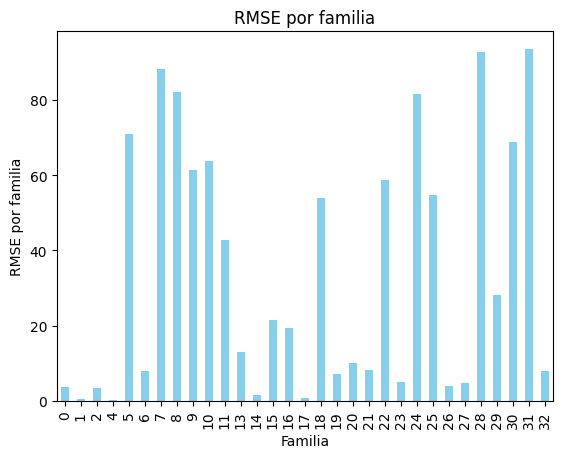

In [33]:
rmse_by_family.plot(kind='bar', color='skyblue')

plt.xlabel('Familia')
plt.ylabel('RMSE por familia')
plt.title('RMSE por familia')
plt.show()